<h1 style = "color : Brown">UpGrad Case Study</h1>

## House Price Prediction

### Problem Statement

A US-based housing company named Surprise Housing has decided to enter the Australian market. The company uses data analytics to purchase houses at a price below their actual values and flip them on at a higher price. For the same purpose, the company has collected a data set from the sale of houses in Australia. The data is provided in the CSV file below.

The company is looking at prospective properties to buy to enter the market. You are required to build a regression model using regularisation in order to predict the actual value of the prospective properties and decide whether to invest in them or not.

The company wants to know:

<h4 style = "color : Brown">Which variables are significant in predicting the price of a house</h4>

<h4 style = "color : Brown">How well those variables describe the price of a house</h4>

<h4 style = "color : Brown">Determine the optimal value of lambda for ridge and lasso regression</h4>

### Business Goal
You are required to model the price of houses with the available independent variables. This model will then be used by the management to understand how exactly the prices vary with the variables. They can accordingly manipulate the strategy of the firm and concentrate on areas that will yield high returns. Further, the model will be a good way for management to understand the pricing dynamics of a new market.

In [118]:
# Importing Libraries

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
from sklearn import metrics

import os

import warnings
warnings.filterwarnings('ignore')

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

# Step 1: Fetching Data and Data Exploration

In [119]:
# Reading the dataset available in the form of CSV file and looking at the data snippet

data = pd.read_csv("train.csv", encoding = 'utf-8')

data.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
0         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
1         Lvl    AllPub       FR2       Gtl      Veenker      Feedr   
2         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
3         Lvl    AllPub    Corner       Gtl      Crawfor       Norm   
4         Lvl    AllPub       FR2       Gtl      NoRidge       Norm   

  Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
0       Norm     1Fam     2Story            7            5       2003   
1       Norm     1Fam     1Story            6            8       1976   
2       Norm     1Fam     2Story            7            5       2001   
3       Norm     1Fam     2Story            7            5       1915   
4       Norm     1Fam     2Story            8            5       2000   

   YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
0          2003     Gable  CompShg     VinylSd     VinylSd    BrkFace   
1          1976     Gable  CompShg     MetalSd     MetalSd       None   
2          2002     Gable  CompShg     VinylSd     VinylSd    BrkFace   
3          1970     Gable  CompShg     Wd Sdng     Wd Shng       None   
4          2000     Gable  CompShg     VinylSd     VinylSd    BrkFace   

   MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure  \
0       196.0        Gd        TA      PConc       Gd       TA           No   
1         0.0        TA        TA     CBlock       Gd       TA           Gd   
2       162.0        Gd        TA      PConc       Gd       TA           Mn   
3         0.0        TA        TA     BrkTil       TA       Gd           No   
4       350.0        Gd        TA      PConc       Gd       TA           Av   

  BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  \
0          GLQ         706          Unf           0        150          856   
1          ALQ         978          Unf           0        284         1262   
2          GLQ         486          Unf           0        434          920   
3          ALQ         216          Unf           0        540          756   
4          GLQ         655          Unf           0        490         1145   

  Heating HeatingQC CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  \
0    GasA        Ex          Y      SBrkr       856       854             0   
1    GasA        Ex          Y      SBrkr      1262         0             0   
2    GasA        Ex          Y      SBrkr       920       866             0   
3    GasA        Gd          Y      SBrkr       961       756             0   
4    GasA        Ex          Y      SBrkr      1145      1053             0   

   GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  \
0       1710             1             0         2         1             3   
1       1262             0             1         2         0             3   
2       1786             1             0         2         1             3   
3       1717             1             0         1         0             3   
4       2198             1             0         2         1             4   

   KitchenAbvGr KitchenQual  TotRmsAbvGrd Functional  Fireplaces FireplaceQu  \
0             1          Gd             8        Typ           0         NaN   
1             1          TA             6        Typ           1          TA   
2             1          Gd             6        Typ           1          TA   
3             1          Gd            

In [120]:
# Looking at the dataset size

data.shape

(1460, 81)

In [121]:
# Check for column details

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [122]:
# Understanding the description of all the numeric features in the dataset

data.describe()

Id   MSSubClass  LotFrontage        LotArea  OverallQual  \
count  1460.000000  1460.000000  1201.000000    1460.000000  1460.000000   
mean    730.500000    56.897260    70.049958   10516.828082     6.099315   
std     421.610009    42.300571    24.284752    9981.264932     1.382997   
min       1.000000    20.000000    21.000000    1300.000000     1.000000   
25%     365.750000    20.000000    59.000000    7553.500000     5.000000   
50%     730.500000    50.000000    69.000000    9478.500000     6.000000   
75%    1095.250000    70.000000    80.000000   11601.500000     7.000000   
max    1460.000000   190.000000   313.000000  215245.000000    10.000000   

       OverallCond    YearBuilt  YearRemodAdd   MasVnrArea   BsmtFinSF1  \
count  1460.000000  1460.000000   1460.000000  1452.000000  1460.000000   
mean      5.575342  1971.267808   1984.865753   103.685262   443.639726   
std       1.112799    30.202904     20.645407   181.066207   456.098091   
min       1.000000  1872.000000   1950.000000     0.000000     0.000000   
25%       5.000000  1954.000000   1967.000000     0.000000     0.000000   
50%       5.000000  1973.000000   1994.000000     0.000000   383.500000   
75%       6.000000  2000.000000   2004.000000   166.000000   712.250000   
max       9.000000  2010.000000   2010.000000  1600.000000  5644.000000   

        BsmtFinSF2    BsmtUnfSF  TotalBsmtSF     1stFlrSF     2ndFlrSF  \
count  1460.000000  1460.000000  1460.000000  1460.000000  1460.000000   
mean     46.549315   567.240411  1057.429452  1162.626712   346.992466   
std     161.319273   441.866955   438.705324   386.587738   436.528436   
min       0.000000     0.000000     0.000000   334.000000     0.000000   
25%       0.000000   223.000000   795.750000   882.000000     0.000000   
50%       0.000000   477.500000   991.500000  1087.000000     0.000000   
75%       0.000000   808.000000  1298.250000  1391.250000   728.000000   
max    1474.000000  2336.000000  6110.000000  4692.000000  2065.000000   

       LowQualFinSF    GrLivArea  BsmtFullBath  BsmtHalfBath     FullBath  \
count   1460.000000  1460.000000   1460.000000   1460.000000  1460.000000   
mean       5.844521  1515.463699      0.425342      0.057534     1.565068   
std       48.623081   525.480383      0.518911      0.238753     0.550916   
min        0.000000   334.000000      0.000000      0.000000     0.000000   
25%        0.000000  1129.500000      0.000000      0.000000     1.000000   
50%        0.000000  1464.000000      0.000000      0.000000     2.000000   
75%        0.000000  1776.750000      1.000000      0.000000     2.000000   
max      572.000000  5642.000000      3.000000      2.000000     3.000000   

          HalfBath  BedroomAbvGr  KitchenAbvGr  TotRmsAbvGrd   Fireplaces  \
count  1460.000000   1460.000000   1460.000000   1460.000000  1460.000000   
mean      0.382877      2.866438      1.046575      6.517808     0.613014   
std       0.502885      0.815778      0.220338      1.625393     0.644666   
min       0.000000      0.000000      0.000000      2.000000     0.000000   
25%       0.000000      2.000000      1.000000      5.000000     0.000000   
50%       0.000000      3.000000      1.000000      6.000000     1.000000   
75%       1.000000      3.000000      1.000000      7.000000     1.000000   
max       2.000000      8.000000      3.000000     14.000000     3.000000   

       GarageYrBlt   GarageCars   GarageArea   WoodDeckSF  OpenPorchSF  \
count  1379.000000  1460.000000  1460.000000  1460.000000  1460.000000   
mean   1978.506164     1.767123   472.980137    94.244521    46.660274   
std      24.689725     0.747315   213.804841   125.338794    66.256028   
min    1900.000000     0.000000     0.000000     0.000000     0.000000   
25%    1961.000000     1.000000   334.500000     0.000000     0.000000   
50%    1980.000000     2.000000   480.000000     0.000000    25.000000   
75%    2002.000000     2.000000   576.000000   168.000000    68.000000   
max    2

### Outlier Check

In [123]:
#Checking for outlier in the numerical columns
data.describe(percentiles=[.25,.5,.75,.90,.95,.99])

Id   MSSubClass  LotFrontage        LotArea  OverallQual  \
count  1460.000000  1460.000000  1201.000000    1460.000000  1460.000000   
mean    730.500000    56.897260    70.049958   10516.828082     6.099315   
std     421.610009    42.300571    24.284752    9981.264932     1.382997   
min       1.000000    20.000000    21.000000    1300.000000     1.000000   
25%     365.750000    20.000000    59.000000    7553.500000     5.000000   
50%     730.500000    50.000000    69.000000    9478.500000     6.000000   
75%    1095.250000    70.000000    80.000000   11601.500000     7.000000   
90%    1314.100000   120.000000    96.000000   14381.700000     8.000000   
95%    1387.050000   160.000000   107.000000   17401.150000     8.000000   
99%    1445.410000   190.000000   141.000000   37567.640000    10.000000   
max    1460.000000   190.000000   313.000000  215245.000000    10.000000   

       OverallCond    YearBuilt  YearRemodAdd   MasVnrArea   BsmtFinSF1  \
count  1460.000000  1460.000000   1460.000000  1452.000000  1460.000000   
mean      5.575342  1971.267808   1984.865753   103.685262   443.639726   
std       1.112799    30.202904     20.645407   181.066207   456.098091   
min       1.000000  1872.000000   1950.000000     0.000000     0.000000   
25%       5.000000  1954.000000   1967.000000     0.000000     0.000000   
50%       5.000000  1973.000000   1994.000000     0.000000   383.500000   
75%       6.000000  2000.000000   2004.000000   166.000000   712.250000   
90%       7.000000  2006.000000   2006.000000   335.000000  1065.500000   
95%       8.000000  2007.000000   2007.000000   456.000000  1274.000000   
99%       9.000000  2009.000000   2009.000000   791.920000  1572.410000   
max       9.000000  2010.000000   2010.000000  1600.000000  5644.000000   

        BsmtFinSF2    BsmtUnfSF  TotalBsmtSF     1stFlrSF     2ndFlrSF  \
count  1460.000000  1460.000000  1460.000000  1460.000000  1460.000000   
mean     46.549315   567.240411  1057.429452  1162.626712   346.992466   
std     161.319273   441.866955   438.705324   386.587738   436.528436   
min       0.000000     0.000000     0.000000   334.000000     0.000000   
25%       0.000000   223.000000   795.750000   882.000000     0.000000   
50%       0.000000   477.500000   991.500000  1087.000000     0.000000   
75%       0.000000   808.000000  1298.250000  1391.250000   728.000000   
90%     117.200000  1232.000000  1602.200000  1680.000000   954.200000   
95%     396.200000  1468.000000  1753.000000  1831.250000  1141.050000   
99%     830.380000  1797.050000  2155.050000  2219.460000  1418.920000   
max    1474.000000  2336.000000  6110.000000  4692.000000  2065.000000   

       LowQualFinSF    GrLivArea  BsmtFullBath  BsmtHalfBath     FullBath  \
count   1460.000000  1460.000000   1460.000000   1460.000000  1460.000000   
mean       5.844521  1515.463699      0.425342      0.057534     1.565068   
std       48.623081   525.480383      0.518911      0.238753     0.550916   
min        0.000000   334.000000      0.000000      0.000000     0.000000   
25%        0.000000  1129.500000      0.000000      0.000000     1.000000   
50%        0.000000  1464.000000      0.000000      0.000000     2.000000   
75%        0.000000  1776.750000      1.000000      0.000000     2.000000   
90%        0.000000  2158.300000      1.000000      0.000000     2.000000   
95%        0.000000  2466.100000      1.000000      1.000000     2.000000   
99%      360.000000  3123.480000      2.000000      1.000000     3.000000   
max      572.000000  5642.000000      3.000000      2.000000     3.000000   

          HalfBath  BedroomAbvGr  KitchenAbvGr  TotRmsAbvGrd   Fireplaces  \
count  1460.000000   1460.000000   1460.000000   1460.000000  1460.000000   
mean      0.382877      2.866438      1.046575      6.517808     0.613014   
std       0.502885      0.815778      0.220338      1.625393     0.644666   
min       0.000000      0.000000      0.000000      2.000000     0.000000   
25%

### Missing Value Check

In [124]:
data.count()

Id               1460
MSSubClass       1460
MSZoning         1460
LotFrontage      1201
LotArea          1460
Street           1460
Alley              91
LotShape         1460
LandContour      1460
Utilities        1460
LotConfig        1460
LandSlope        1460
Neighborhood     1460
Condition1       1460
Condition2       1460
BldgType         1460
HouseStyle       1460
OverallQual      1460
OverallCond      1460
YearBuilt        1460
YearRemodAdd     1460
RoofStyle        1460
RoofMatl         1460
Exterior1st      1460
Exterior2nd      1460
MasVnrType       1452
MasVnrArea       1452
ExterQual        1460
ExterCond        1460
Foundation       1460
BsmtQual         1423
BsmtCond         1423
BsmtExposure     1422
BsmtFinType1     1423
BsmtFinSF1       1460
BsmtFinType2     1422
BsmtFinSF2       1460
BsmtUnfSF        1460
TotalBsmtSF      1460
Heating          1460
HeatingQC        1460
CentralAir       1460
Electrical       1459
1stFlrSF         1460
2ndFlrSF         1460
LowQualFin

### Handling Null Data and Data Massaging

In [125]:
# since, it is clear that there are multiple columns with high nulls, lets group them together

data.columns[data.isnull().any()] 

null = data.isnull().sum()/len(data)*100
null = null[null>0]
null.sort_values(inplace=True, ascending=False)
null

PoolQC          99.520548
MiscFeature     96.301370
Alley           93.767123
Fence           80.753425
FireplaceQu     47.260274
LotFrontage     17.739726
GarageType       5.547945
GarageYrBlt      5.547945
GarageFinish     5.547945
GarageQual       5.547945
GarageCond       5.547945
BsmtExposure     2.602740
BsmtFinType2     2.602740
BsmtFinType1     2.534247
BsmtCond         2.534247
BsmtQual         2.534247
MasVnrArea       0.547945
MasVnrType       0.547945
Electrical       0.068493
dtype: float64

####  Handling categorical variables with 'None'

In [126]:
# According to the data dictionary provided, the nulls in these columns indicates the absence of facility which may affect the price
# Hence, we will first impute the categorical variables with 'None'
null_with_meaning = ["Alley", "MasVnrType", "BsmtQual", 
                     "BsmtCond", "BsmtExposure", "BsmtFinType1", 
                     "BsmtFinType2", "FireplaceQu", "GarageType", 
                     "GarageFinish", "GarageQual", "GarageCond", 
                     "PoolQC", "Fence", "MiscFeature"]
for i in null_with_meaning:
    data[i].fillna("none", inplace=True)

In [127]:
# Check nulls once again

data.columns[data.isnull().any()] 

null_2 = data.isnull().sum()/len(data)*100
null_2 = null_2[null_2>0]
null_2.sort_values(inplace=True, ascending=False)
null_2

LotFrontage    17.739726
GarageYrBlt     5.547945
MasVnrArea      0.547945
Electrical      0.068493
dtype: float64

####  Handling NA numeric variables

In [128]:
# As per the data dictionary "LotFrontage" is Linear feet of street connected to property.  
# Since it is a numeric with a fair distribution, it can be imputed with similar 'Neighborhood' values
# GarageYrBlt, MasVnrArea can be imputed with respective median values
# Dropping all null Electrical values

data['LotFrontage'] = data.groupby("Neighborhood")["LotFrontage"].transform(lambda x: x.fillna(x.median()))
data["GarageYrBlt"].fillna(data["GarageYrBlt"].median(), inplace=True)
data["MasVnrArea"].fillna(data["MasVnrArea"].median(), inplace=True)
data["Electrical"].dropna(inplace=True)

In [129]:
# Check nulls once again

data.columns[data.isnull().any()] 

null_2 = data.isnull().sum()/len(data)*100
null_2 = null_2[null_2>0]
null_2.sort_values(inplace=True, ascending=False)
null_2

Electrical    0.068493
dtype: float64

# Step 2: Data Visualization


#### Checking data distribution for continuous numerical columns


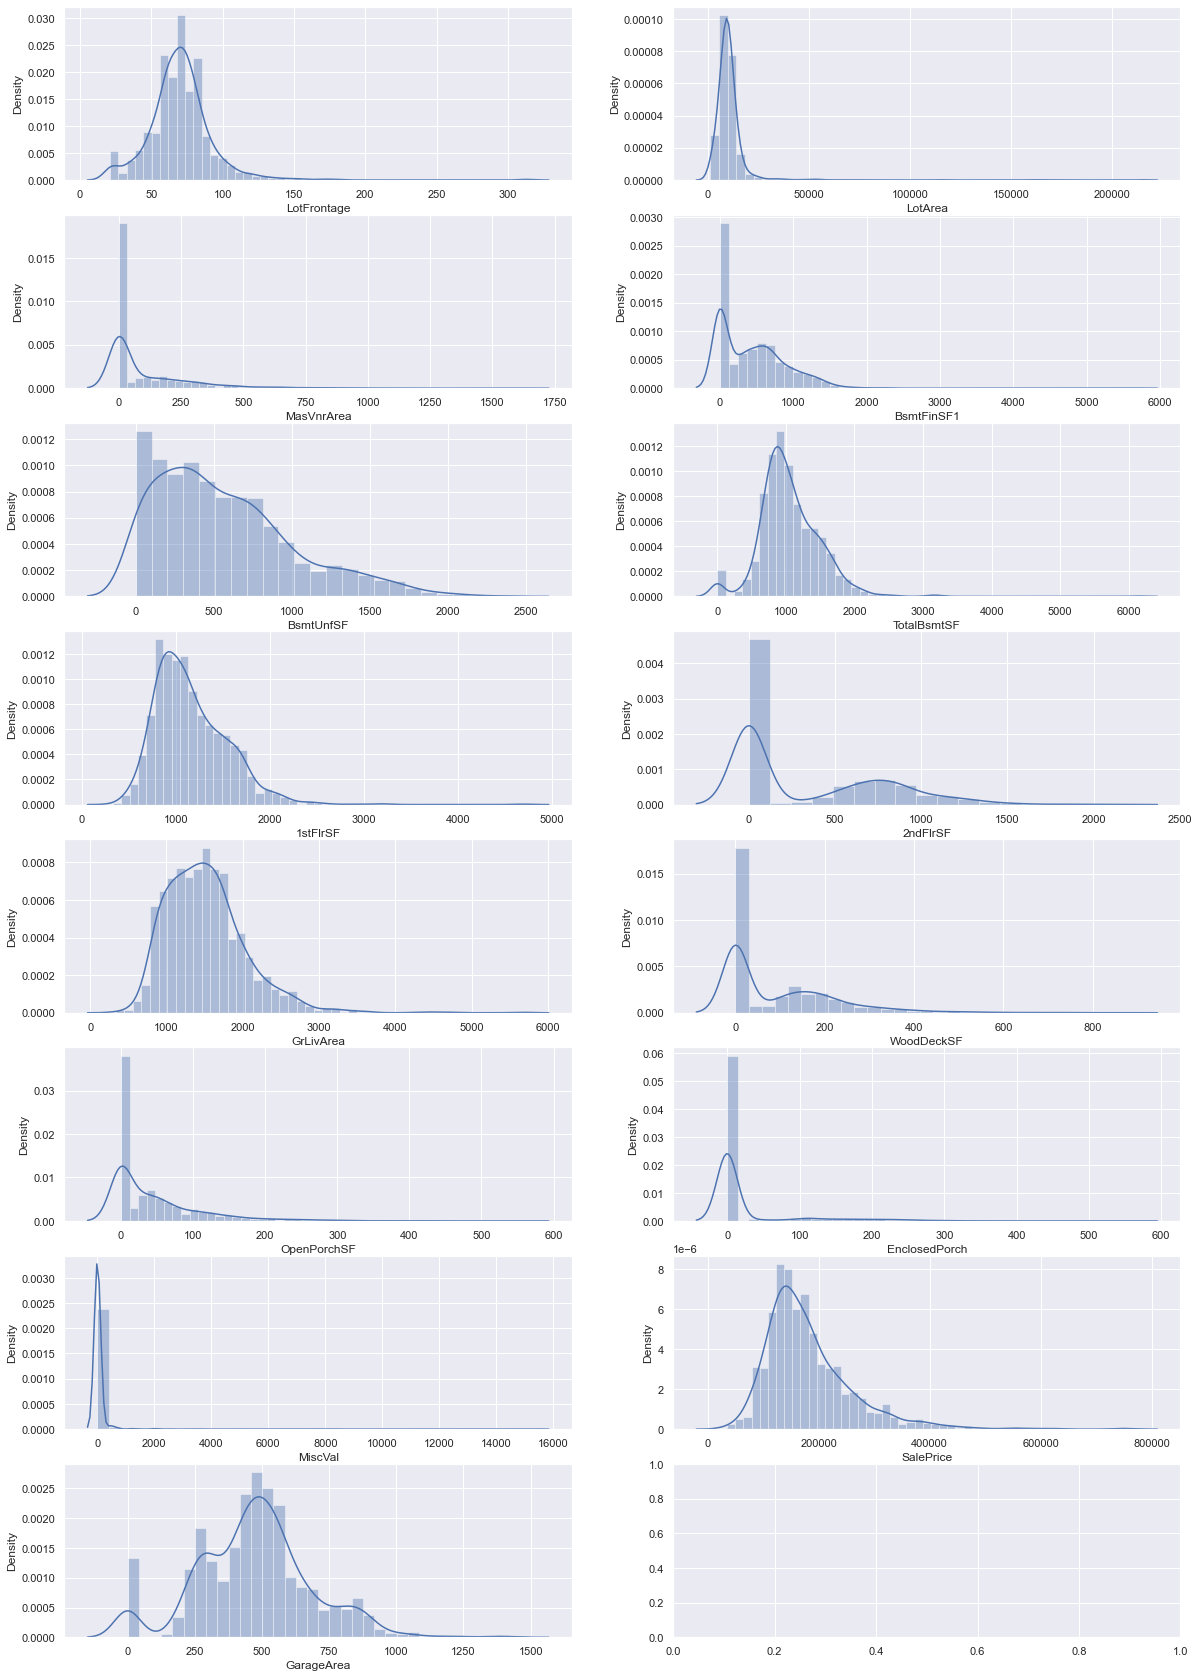

In [130]:
# Plotting histogram for continuous numerical columns
fig,ax = plt.subplots(nrows = 8,ncols = 2,figsize = [20,30])
sns.distplot(data['LotFrontage'],ax = ax[0,0])
sns.distplot(data['LotArea'],ax = ax[0,1])
sns.distplot(data['MasVnrArea'],ax = ax[1,0])
sns.distplot(data['BsmtFinSF1'],ax = ax[1,1])
sns.distplot(data['BsmtUnfSF'],ax = ax[2,0])
sns.distplot(data['TotalBsmtSF'],ax = ax[2,1])
sns.distplot(data['1stFlrSF'],ax = ax[3,0])
sns.distplot(data['2ndFlrSF'],ax = ax[3,1])
sns.distplot(data['GrLivArea'],ax = ax[4,0])
sns.distplot(data['WoodDeckSF'],ax = ax[4,1])
sns.distplot(data['OpenPorchSF'],ax = ax[5,0])
sns.distplot(data['EnclosedPorch'],ax = ax[5,1])
sns.distplot(data['MiscVal'],ax = ax[6,0])
sns.distplot(data['SalePrice'],ax = ax[6,1])
sns.distplot(data['GarageArea'],ax = ax[7,0])
plt.show()

#### Dropping ID Column

In [131]:
data_numeric = data.select_dtypes(include=['float64', 'int64'])
data_numeric.head()

Id  MSSubClass  LotFrontage  LotArea  OverallQual  OverallCond  YearBuilt  \
0   1          60         65.0     8450            7            5       2003   
1   2          20         80.0     9600            6            8       1976   
2   3          60         68.0    11250            7            5       2001   
3   4          70         60.0     9550            7            5       1915   
4   5          60         84.0    14260            8            5       2000   

   YearRemodAdd  MasVnrArea  BsmtFinSF1  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  \
0          2003       196.0         706           0        150          856   
1          1976         0.0         978           0        284         1262   
2          2002       162.0         486           0        434          920   
3          1970         0.0         216           0        540          756   
4          2000       350.0         655           0        490         1145   

   1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  BsmtFullBath  BsmtHalfBath  \
0       856       854             0       1710             1             0   
1      1262         0             0       1262             0             1   
2       920       866             0       1786             1             0   
3       961       756             0       1717             1             0   
4      1145      1053             0       2198             1             0   

   FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr  TotRmsAbvGrd  Fireplaces  \
0         2         1             3             1             8           0   
1         2         0             3             1             6           1   
2         2         1             3             1             6           1   
3         1         0             3             1             7           1   
4         2         1             4             1             9           1   

   GarageYrBlt  GarageCars  GarageArea  WoodDeckSF  OpenPorchSF  \
0       2003.0           2         548           0           61   
1       1976.0           2         460         298            0   
2       2001.0           2         608           0           42   
3       1998.0           3         642           0           35   
4       2000.0           3         836         192           84   

   EnclosedPorch  3SsnPorch  ScreenPorch  PoolArea  MiscVal  MoSold  YrSold  \
0              0          0            0         0        0       2    2008   
1              0          0            0         0        0       5    2007   
2              0          0            0         0        0       9    2008   
3            272          0            0         0        0       2    2006   
4              0          0            0         0        0      12    2008   

   SalePrice  
0     208500  
1     181500  
2     223500  
3     140000  
4     250000

In [132]:
# Dropping ID Column
data_numeric = data_numeric.drop(['Id'], axis=1)
data_numeric.head()

MSSubClass  LotFrontage  LotArea  OverallQual  OverallCond  YearBuilt  \
0          60         65.0     8450            7            5       2003   
1          20         80.0     9600            6            8       1976   
2          60         68.0    11250            7            5       2001   
3          70         60.0     9550            7            5       1915   
4          60         84.0    14260            8            5       2000   

   YearRemodAdd  MasVnrArea  BsmtFinSF1  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  \
0          2003       196.0         706           0        150          856   
1          1976         0.0         978           0        284         1262   
2          2002       162.0         486           0        434          920   
3          1970         0.0         216           0        540          756   
4          2000       350.0         655           0        490         1145   

   1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  BsmtFullBath  BsmtHalfBath  \
0       856       854             0       1710             1             0   
1      1262         0             0       1262             0             1   
2       920       866             0       1786             1             0   
3       961       756             0       1717             1             0   
4      1145      1053             0       2198             1             0   

   FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr  TotRmsAbvGrd  Fireplaces  \
0         2         1             3             1             8           0   
1         2         0             3             1             6           1   
2         2         1             3             1             6           1   
3         1         0             3             1             7           1   
4         2         1             4             1             9           1   

   GarageYrBlt  GarageCars  GarageArea  WoodDeckSF  OpenPorchSF  \
0       2003.0           2         548           0           61   
1       1976.0           2         460         298            0   
2       2001.0           2         608           0           42   
3       1998.0           3         642           0           35   
4       2000.0           3         836         192           84   

   EnclosedPorch  3SsnPorch  ScreenPorch  PoolArea  MiscVal  MoSold  YrSold  \
0              0          0            0         0        0       2    2008   
1              0          0            0         0        0       5    2007   
2              0          0            0         0        0       9    2008   
3            272          0            0         0        0       2    2006   
4              0          0            0         0        0      12    2008   

   SalePrice  
0     208500  
1     181500  
2     223500  
3     140000  
4     250000

#### Target variable 'sale Price' vs a few select columns

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24]),
 [Text(0, 0, 'CollgCr'),
  Text(1, 0, 'Veenker'),
  Text(2, 0, 'Crawfor'),
  Text(3, 0, 'NoRidge'),
  Text(4, 0, 'Mitchel'),
  Text(5, 0, 'Somerst'),
  Text(6, 0, 'NWAmes'),
  Text(7, 0, 'OldTown'),
  Text(8, 0, 'BrkSide'),
  Text(9, 0, 'Sawyer'),
  Text(10, 0, 'NridgHt'),
  Text(11, 0, 'NAmes'),
  Text(12, 0, 'SawyerW'),
  Text(13, 0, 'IDOTRR'),
  Text(14, 0, 'MeadowV'),
  Text(15, 0, 'Edwards'),
  Text(16, 0, 'Timber'),
  Text(17, 0, 'Gilbert'),
  Text(18, 0, 'StoneBr'),
  Text(19, 0, 'ClearCr'),
  Text(20, 0, 'NPkVill'),
  Text(21, 0, 'Blmngtn'),
  Text(22, 0, 'BrDale'),
  Text(23, 0, 'SWISU'),
  Text(24, 0, 'Blueste')])

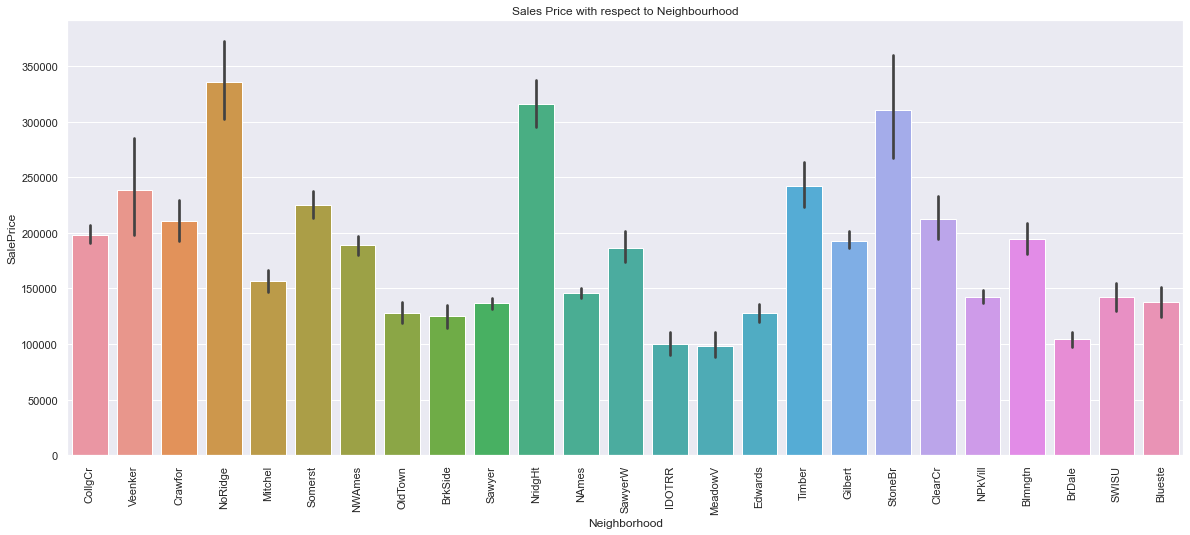

In [133]:
# plot 'Sale Price' with respect to 'Neighborhood'

plt.figure(figsize=(20, 8))
sns.barplot(x="Neighborhood", y="SalePrice", data= data)
plt.title("Sales Price with respect to Neighbourhood")
plt.xticks(rotation=90)

#### Observation : Properties in some of the Neighborhoods are high priced.

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, '1'),
  Text(1, 0, '2'),
  Text(2, 0, '3'),
  Text(3, 0, '4'),
  Text(4, 0, '5'),
  Text(5, 0, '6'),
  Text(6, 0, '7'),
  Text(7, 0, '8'),
  Text(8, 0, '9'),
  Text(9, 0, '10')])

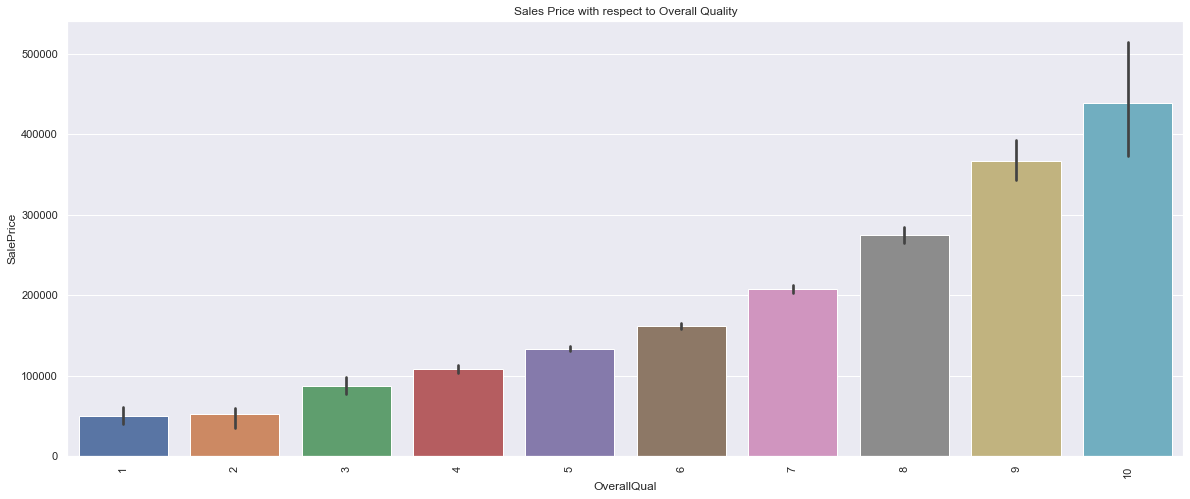

In [134]:
# plot 'overall quality' with respect to 'Saleprice'

plt.figure(figsize=(20, 8))
sns.barplot(x="OverallQual", y="SalePrice", data= data)
plt.title("Sales Price with respect to Overall Quality")
plt.xticks(rotation=90)

  ##### Observation : Better the quality higher the price demanded. Quality 10 has the highest price.

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


<AxesSubplot:xlabel='LotFrontage', ylabel='SalePrice'>

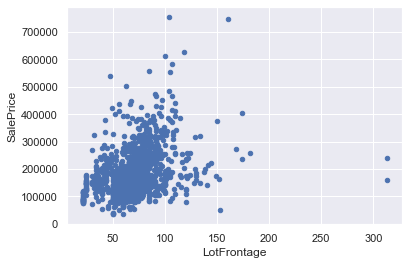

In [135]:
# plot 'Age of House' with respect to 'Saleprice'

data.plot.scatter(x= 'LotFrontage', y='SalePrice')

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


<AxesSubplot:xlabel='TotalBsmtSF', ylabel='SalePrice'>

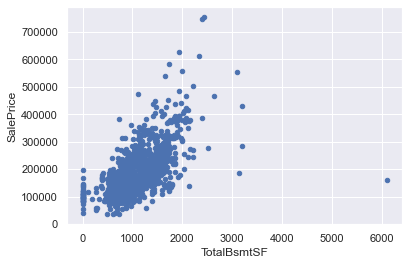

In [136]:
# plot 'TotalBsmtSF' with respect to 'Saleprice'

data.plot.scatter(x= 'TotalBsmtSF', y='SalePrice')

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


<AxesSubplot:xlabel='GrLivArea', ylabel='SalePrice'>

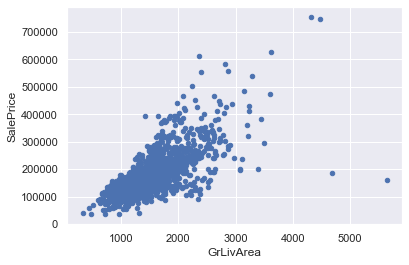

In [137]:
# plot 'GrLivArea' with respect to 'Saleprice'

data.plot.scatter(x= 'GrLivArea', y='SalePrice')

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


<AxesSubplot:xlabel='1stFlrSF', ylabel='SalePrice'>

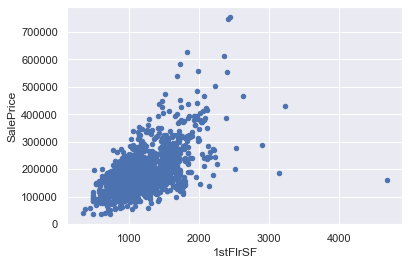

In [138]:
# plot '1stFlrSF' with respect to 'Saleprice'

data.plot.scatter(x= '1stFlrSF', y='SalePrice')

#### Observations
##### Attributes 'LotFrontage','TotalBsmtSF','1stFlrSF','GrLivArea'  have a direct corelation with the price of the property.
##### Total basement area, which is linearly related with the total living area, also is directly proportional to the price of the property.

<AxesSubplot:xlabel='SalePrice', ylabel='Density'>

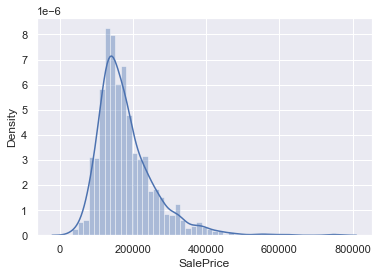

In [139]:
sns.distplot(data['SalePrice'])

In [140]:
data_raw = data.copy

### Since the Saleprice figures are skewed towards left, we will apply the log transformation to obtain a centralized data

In [141]:
#Log Transformation
data['SalePrice']=np.log1p(data['SalePrice'])

<AxesSubplot:xlabel='SalePrice', ylabel='Density'>

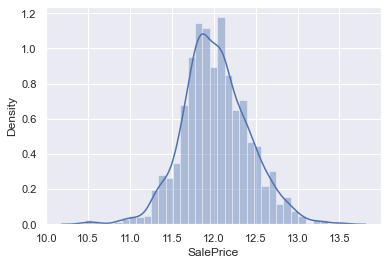

In [142]:
sns.distplot(data['SalePrice'])

In [143]:
# correlation matrix
data_numeric = data.select_dtypes(include=['float64', 'int64'])

cor = data_numeric.corr()

cor

Id  MSSubClass  LotFrontage   LotArea  OverallQual  \
Id             1.000000    0.011156    -0.003381 -0.033226    -0.028365   
MSSubClass     0.011156    1.000000    -0.370367 -0.139781     0.032628   
LotFrontage   -0.003381   -0.370367     1.000000  0.335957     0.239546   
LotArea       -0.033226   -0.139781     0.335957  1.000000     0.105806   
OverallQual   -0.028365    0.032628     0.239546  0.105806     1.000000   
OverallCond    0.012609   -0.059316    -0.043595 -0.005636    -0.091932   
YearBuilt     -0.012713    0.027850     0.120999  0.014228     0.572323   
YearRemodAdd  -0.021998    0.040581     0.084550  0.013788     0.550684   
MasVnrArea    -0.051071    0.023573     0.195830  0.103321     0.407252   
BsmtFinSF1    -0.005024   -0.069836     0.232576  0.214103     0.239666   
BsmtFinSF2    -0.005968   -0.065649     0.052237  0.111170    -0.059119   
BsmtUnfSF     -0.007940   -0.140759     0.119174 -0.002618     0.308159   
TotalBsmtSF   -0.015415   -0.238518     0.381038  0.260833     0.537808   
1stFlrSF       0.010496   -0.251758     0.434109  0.299475     0.476224   
2ndFlrSF       0.005590    0.307886     0.075686  0.050986     0.295493   
LowQualFinSF  -0.044230    0.046474     0.031873  0.004779    -0.030429   
GrLivArea      0.008273    0.074853     0.385190  0.263116     0.593007   
BsmtFullBath   0.002289    0.003491     0.107226  0.158155     0.111098   
BsmtHalfBath  -0.020155   -0.002333     0.006620  0.048046    -0.040150   
FullBath       0.005587    0.131608     0.186561  0.126031     0.550600   
HalfBath       0.006784    0.177354     0.054190  0.014259     0.273458   
BedroomAbvGr   0.037719   -0.023438     0.245232  0.119690     0.101676   
KitchenAbvGr   0.002951    0.281721    -0.005627 -0.017784    -0.183882   
TotRmsAbvGrd   0.027239    0.040380     0.332619  0.190015     0.427452   
Fireplaces    -0.019772   -0.045569     0.249295  0.271364     0.396765   
GarageYrBlt   -0.000122    0.081396     0.062380 -0.025865     0.514231   
GarageCars     0.016570   -0.040110     0.281393  0.154871     0.600671   
GarageArea     0.017634   -0.098672     0.339085  0.180403     0.562022   
WoodDeckSF    -0.029643   -0.012579     0.088736  0.171698     0.238923   
OpenPorchSF   -0.000477   -0.006100     0.141734  0.084774     0.308819   
EnclosedPorch  0.002889   -0.012037     0.008057 -0.018340    -0.113937   
3SsnPorch     -0.046635   -0.043825     0.064654  0.020423     0.030371   
ScreenPorch    0.001330   -0.026030     0.041063  0.043160     0.064886   
PoolArea       0.057044    0.008283     0.174567  0.077672     0.065166   
MiscVal       -0.006242   -0.007683     0.005332  0.038068    -0.031406   
MoSold         0.021172   -0.013585     0.007370  0.001205     0.070815   
YrSold         0.000712   -0.021407     0.004756 -0.014261    -0.027347   
SalePrice     -0.017942   -0.073959     0.353288  0.257320     0.817185   

               OverallCond  YearBuilt  YearRemodAdd  MasVnrArea  BsmtFinSF1  \
Id                0.012609  -0.012713     -0.021998   -0.051071   -0.005024   
MSSubClass       -0.059316   0.027850      0.040581    0.023573   -0.069836   
LotFrontage      -0.043595   0.120999      0.084550    0.195830    0.232576   
LotArea          -0.005636   0.014228      0.013788    0.103321    0.214103   
OverallQual      -0.091932   0.572323      0.550684    0.407252    0.239666   
OverallCond       1.000000  -0.375983      0.073741   -0.125694   -0.046231   
YearBuilt        -0.375983   1.000000      0.592855    0.311600    0.249503   
YearRemodAdd      0.073741   0.592855      1.000000    0.176529    0.128451   
MasVnrArea       -0.125694   0.311600      0.176529    1.000000    0.261256   
BsmtFinSF1       -0.046231   0.249503      0.128451    0.261256    1.000000   
BsmtFinSF2        0.040229  -0.049107     -0.067759   -0.071330   -0.050117   
BsmtUnfSF        -0.136841   0.149040      0.181133    0.113862   -0.495251   
TotalBsmtSF      -0.171098   0.391452      0.291066    0.360067    0

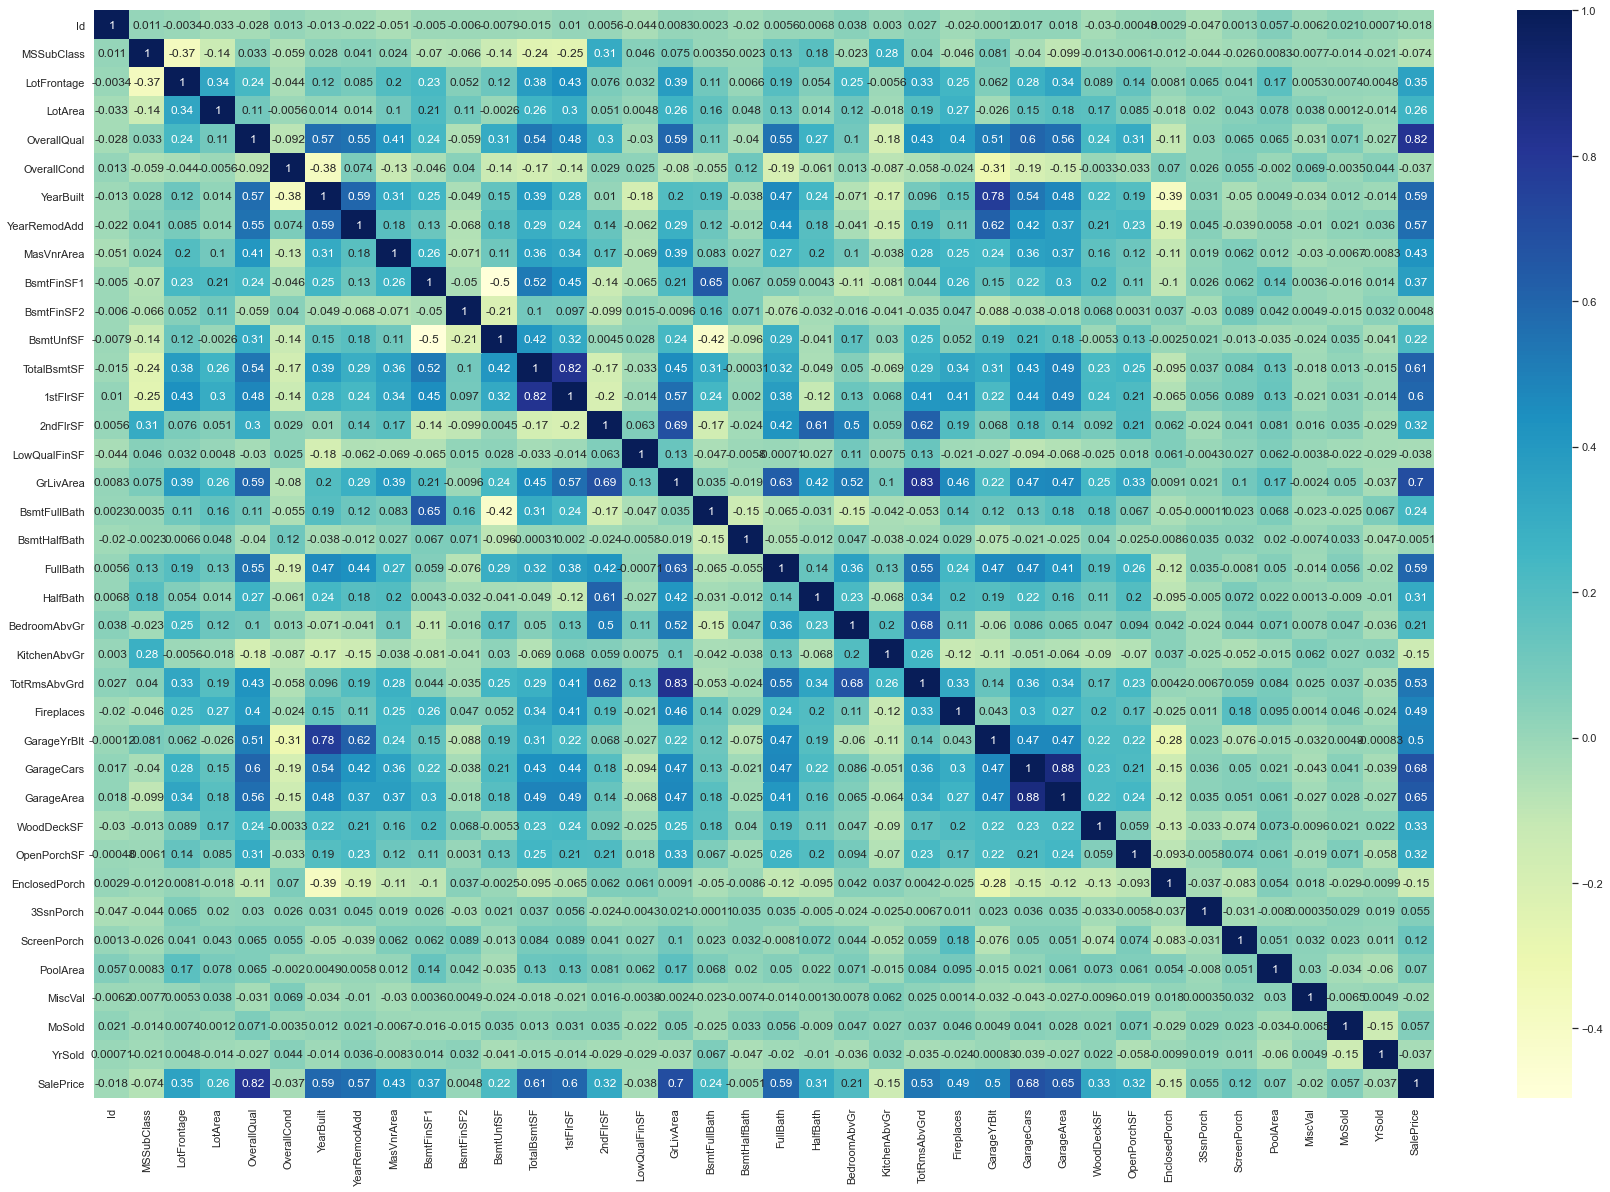

In [144]:
# plotting correlations on a heatmap

# figure size
plt.figure(figsize=(30,20))

# heatmap
sns.heatmap(cor, cmap="YlGnBu", annot=True)
plt.show()

#### We can see that some of the variables are correlated

#### Before dropping these columns, we will first check their predictive power

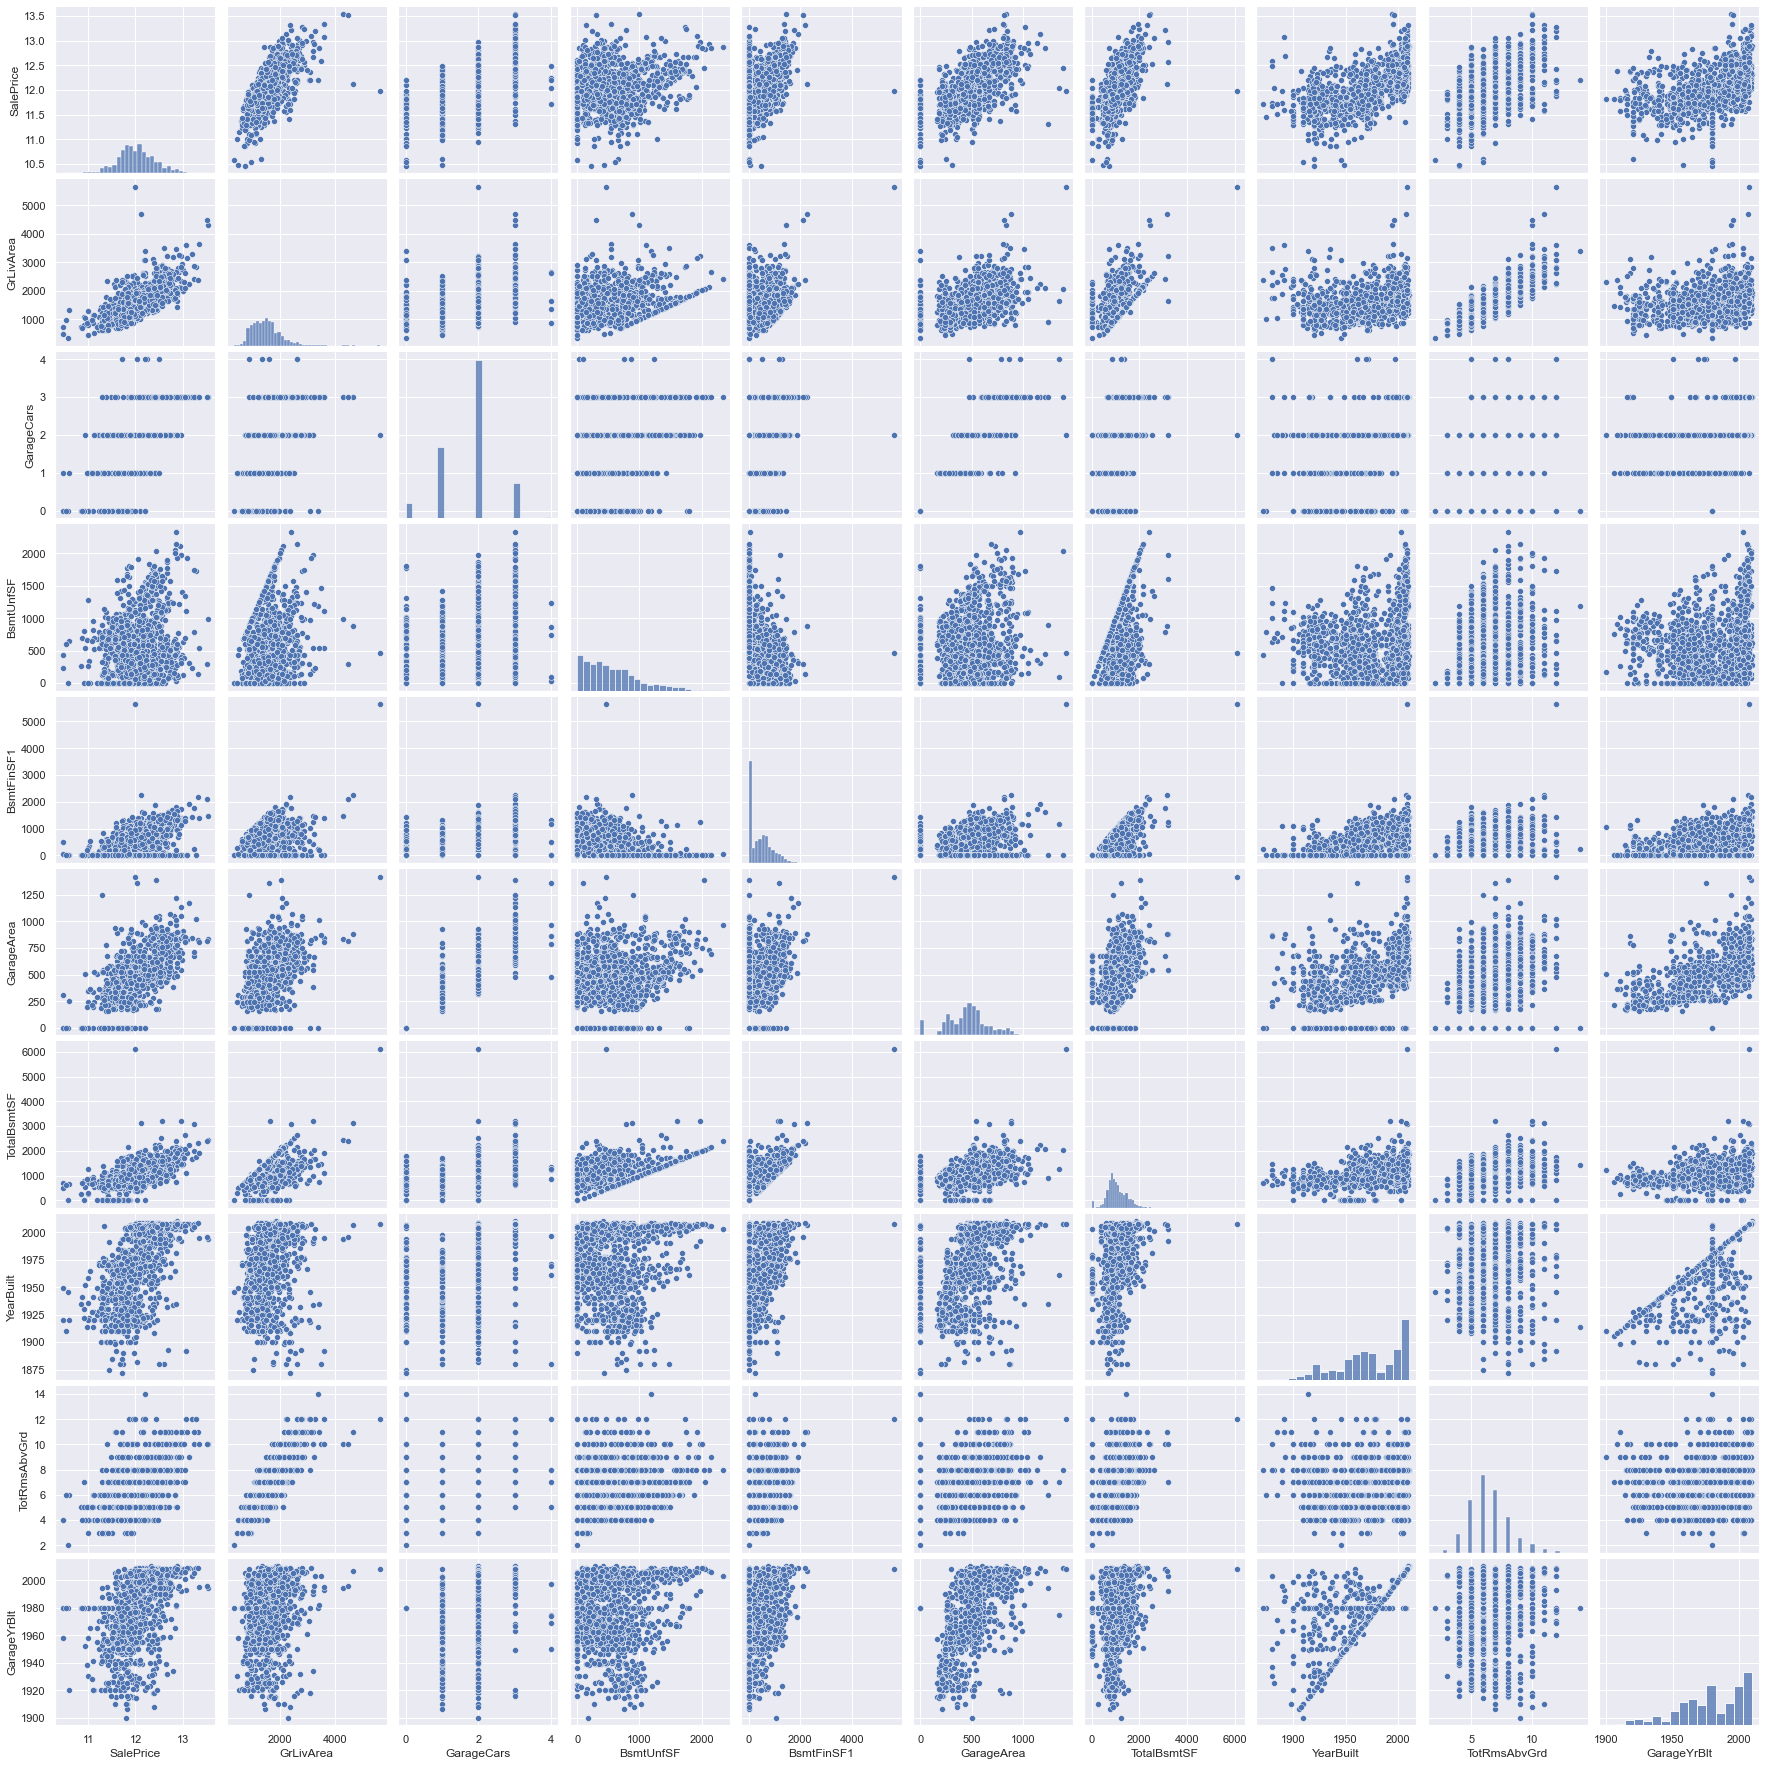

In [145]:
# Checking the same with a pairplot 
sns.set()
cols = ['SalePrice', 'GrLivArea', 'GarageCars', 'BsmtUnfSF', 'BsmtFinSF1', 'GarageArea', 'TotalBsmtSF', 'YearBuilt', 'TotRmsAbvGrd', 'GarageYrBlt']
sns.pairplot(data[cols], size = 2.5)
plt.show()

### Drop columns that are correlated and not contributing to 'SalePrice'

In [146]:
data = data.drop(['GarageCars'], axis = 1)
data = data.drop(['BsmtUnfSF'], axis = 1)
data = data.drop(['TotRmsAbvGrd'], axis = 1)
data = data.drop(['GarageYrBlt'], axis = 1)    

data.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave  none      Reg   
1   2          20       RL         80.0     9600   Pave  none      Reg   
2   3          60       RL         68.0    11250   Pave  none      IR1   
3   4          70       RL         60.0     9550   Pave  none      IR1   
4   5          60       RL         84.0    14260   Pave  none      IR1   

  LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
0         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
1         Lvl    AllPub       FR2       Gtl      Veenker      Feedr   
2         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
3         Lvl    AllPub    Corner       Gtl      Crawfor       Norm   
4         Lvl    AllPub       FR2       Gtl      NoRidge       Norm   

  Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
0       Norm     1Fam     2Story            7            5       2003   
1       Norm     1Fam     1Story            6            8       1976   
2       Norm     1Fam     2Story            7            5       2001   
3       Norm     1Fam     2Story            7            5       1915   
4       Norm     1Fam     2Story            8            5       2000   

   YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
0          2003     Gable  CompShg     VinylSd     VinylSd    BrkFace   
1          1976     Gable  CompShg     MetalSd     MetalSd       None   
2          2002     Gable  CompShg     VinylSd     VinylSd    BrkFace   
3          1970     Gable  CompShg     Wd Sdng     Wd Shng       None   
4          2000     Gable  CompShg     VinylSd     VinylSd    BrkFace   

   MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure  \
0       196.0        Gd        TA      PConc       Gd       TA           No   
1         0.0        TA        TA     CBlock       Gd       TA           Gd   
2       162.0        Gd        TA      PConc       Gd       TA           Mn   
3         0.0        TA        TA     BrkTil       TA       Gd           No   
4       350.0        Gd        TA      PConc       Gd       TA           Av   

  BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  TotalBsmtSF Heating  \
0          GLQ         706          Unf           0          856    GasA   
1          ALQ         978          Unf           0         1262    GasA   
2          GLQ         486          Unf           0          920    GasA   
3          ALQ         216          Unf           0          756    GasA   
4          GLQ         655          Unf           0         1145    GasA   

  HeatingQC CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  \
0        Ex          Y      SBrkr       856       854             0   
1        Ex          Y      SBrkr      1262         0             0   
2        Ex          Y      SBrkr       920       866             0   
3        Gd          Y      SBrkr       961       756             0   
4        Ex          Y      SBrkr      1145      1053             0   

   GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  \
0       1710             1             0         2         1             3   
1       1262             0             1         2         0             3   
2       1786             1             0         2         1             3   
3       1717             1             0         1         0             3   
4       2198             1             0         2         1             4   

   KitchenAbvGr KitchenQual Functional  Fireplaces FireplaceQu GarageType  \
0             1          Gd        Typ           0        none     Attchd   
1             1          TA        Typ           1          TA     Attchd   
2             1          Gd        Typ           1          TA     Attchd   
3             1          Gd        Typ           1          Gd     Detchd   
4             1          Gd        Typ  

In [147]:
#Numeric columns
data.select_dtypes(exclude=['object'])

Id  MSSubClass  LotFrontage  LotArea  OverallQual  OverallCond  \
0        1          60         65.0     8450            7            5   
1        2          20         80.0     9600            6            8   
2        3          60         68.0    11250            7            5   
3        4          70         60.0     9550            7            5   
4        5          60         84.0    14260            8            5   
5        6          50         85.0    14115            5            5   
6        7          20         75.0    10084            8            5   
7        8          60         80.0    10382            7            6   
8        9          50         51.0     6120            7            5   
9       10         190         50.0     7420            5            6   
10      11          20         70.0    11200            5            5   
11      12          60         85.0    11924            9            5   
12      13          20         71.0    12968            5            6   
13      14          20         91.0    10652            7            5   
14      15          20         73.0    10920            6            5   
15      16          45         51.0     6120            7            8   
16      17          20         73.0    11241            6            7   
17      18          90         72.0    10791            4            5   
18      19          20         66.0    13695            5            5   
19      20          20         70.0     7560            5            6   
20      21          60        101.0    14215            8            5   
21      22          45         57.0     7449            7            7   
22      23          20         75.0     9742            8            5   
23      24         120         44.0     4224            5            7   
24      25          20         71.0     8246            5            8   
25      26          20        110.0    14230            8            5   
26      27          20         60.0     7200            5            7   
27      28          20         98.0    11478            8            5   
28      29          20         47.0    16321            5            6   
29      30          30         60.0     6324            4            6   
30      31          70         50.0     8500            4            4   
31      32          20         71.0     8544            5            6   
32      33          20         85.0    11049            8            5   
33      34          20         70.0    10552            5            5   
34      35         120         60.0     7313            9            5   
35      36          60        108.0    13418            8            5   
36      37          20        112.0    10859            5            5   
37      38          20         74.0     8532            5            6   
38      39          20         68.0     7922            5            7   
39      40          90         65.0     6040            4            5   
40      41          20         84.0     8658            6            5   
41      42          20        115.0    16905            5            6   
42      43          85         66.5     9180            5            7   
43      44          20         70.0     9200            5            6   
44      45          20         70.0     7945            5            6   
45      46         120         61.0     7658            9            5   
46      47          50         48.0    12822            7            5   
47      48          20         84.0    11096            8            5   
48      49         190         33.0     4456            4            5   
49      50          20         66.0     7742            5            7   
50      51          60         65.0    13869            6            6   
51      52          50         52.0     6240            6            6   
52      53          90        110.0     8472            5            5   
53      54  

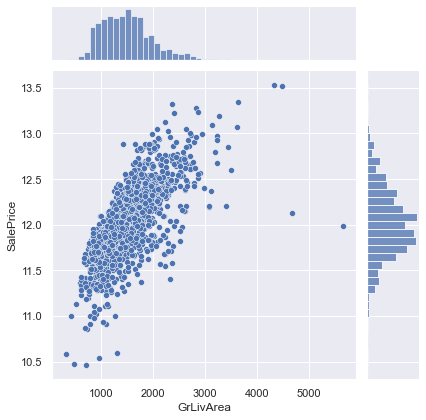

In [148]:
# Analyse some important numeric columns
sns.jointplot(x='GrLivArea', y='SalePrice', data=data)
plt.show()

In [149]:
def remove_outliers(x,y):
    q1 = x[y].quantile(0.25)
    q3 = x[y].quantile(0.75)
    value = q3-q1
    lower_value  = q1-1.5*value
    higer_value = q3+1.5*value
    out= x[(x[y]<higer_value) & (x[y]>lower_value)]
    return out

In [150]:
# Removing some outliers on lower right side of 'GrLivArea'
data = remove_outliers(data,'GrLivArea')

### Since the dataset is small it isn't advisable to do remove outliers.

In [151]:
data.shape

(1429, 77)

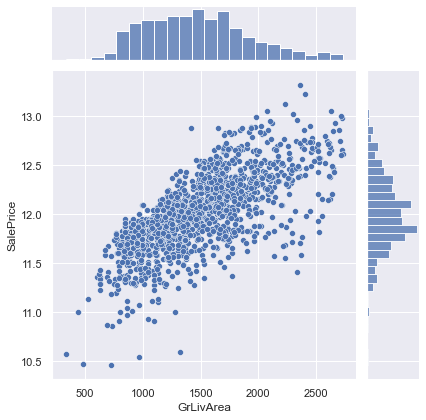

In [152]:
# Again plotting GeLivArea vs SalePrice
sns.jointplot(x = data['GrLivArea'], y = data['SalePrice'])
plt.show()

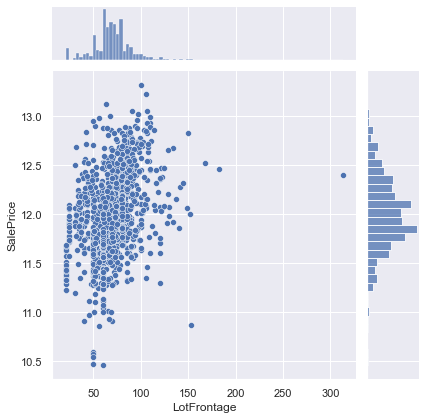

In [153]:
# Lot frontage vs SalePrice 
sns.jointplot(x = data['LotFrontage'], y = data['SalePrice'])
plt.show()

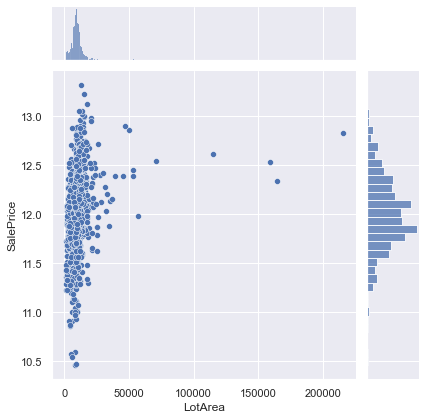

In [154]:
# LotArea vs SalePrice
sns.jointplot(x = data['LotArea'], y = data['SalePrice'])
plt.show()

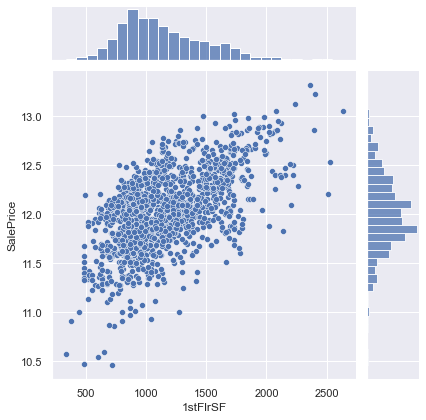

In [155]:
# 1stFlrSF vs SalePrice
sns.jointplot(x = data['1stFlrSF'], y = data['SalePrice'])
plt.show()

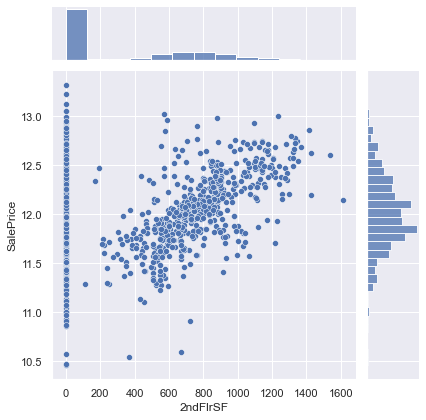

In [156]:
# 2ndFlrSF vs SalePrice
sns.jointplot(x = data['2ndFlrSF'], y = data['SalePrice'])
plt.show()

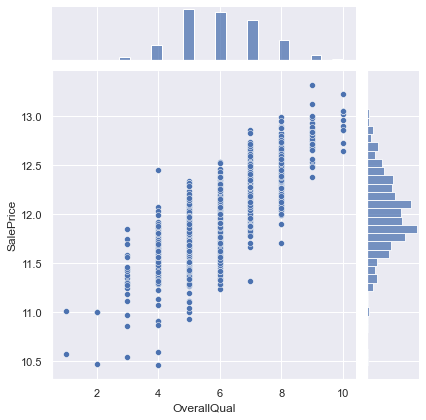

In [157]:
# OverallQual vs SalePrice
sns.jointplot(x = data['OverallQual'], y = data['SalePrice'])
plt.show()

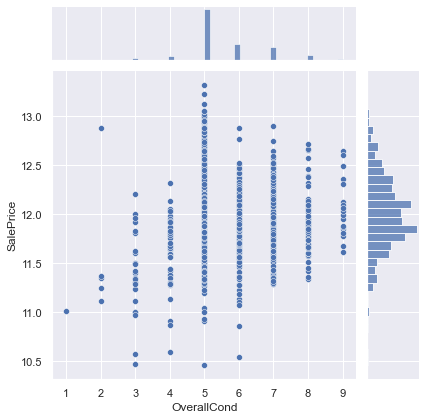

In [158]:
# OverallCond vs SalePrice
sns.jointplot(x=data['OverallCond'], y = data['SalePrice'])
plt.show()

#### Ground or First level houses i.e. '0' second floor Sq.Ft has also a steady increase

### We can derive a column for 'Age of the property' when it was sold: Name it as 'PropAge'

In [159]:
# PropAge -  Property Age from yearsold - yearbuilt
data['PropAge'] = (data['YrSold'] - data['YearBuilt'])
data.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave  none      Reg   
1   2          20       RL         80.0     9600   Pave  none      Reg   
2   3          60       RL         68.0    11250   Pave  none      IR1   
3   4          70       RL         60.0     9550   Pave  none      IR1   
4   5          60       RL         84.0    14260   Pave  none      IR1   

  LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
0         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
1         Lvl    AllPub       FR2       Gtl      Veenker      Feedr   
2         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
3         Lvl    AllPub    Corner       Gtl      Crawfor       Norm   
4         Lvl    AllPub       FR2       Gtl      NoRidge       Norm   

  Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
0       Norm     1Fam     2Story            7            5       2003   
1       Norm     1Fam     1Story            6            8       1976   
2       Norm     1Fam     2Story            7            5       2001   
3       Norm     1Fam     2Story            7            5       1915   
4       Norm     1Fam     2Story            8            5       2000   

   YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
0          2003     Gable  CompShg     VinylSd     VinylSd    BrkFace   
1          1976     Gable  CompShg     MetalSd     MetalSd       None   
2          2002     Gable  CompShg     VinylSd     VinylSd    BrkFace   
3          1970     Gable  CompShg     Wd Sdng     Wd Shng       None   
4          2000     Gable  CompShg     VinylSd     VinylSd    BrkFace   

   MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure  \
0       196.0        Gd        TA      PConc       Gd       TA           No   
1         0.0        TA        TA     CBlock       Gd       TA           Gd   
2       162.0        Gd        TA      PConc       Gd       TA           Mn   
3         0.0        TA        TA     BrkTil       TA       Gd           No   
4       350.0        Gd        TA      PConc       Gd       TA           Av   

  BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  TotalBsmtSF Heating  \
0          GLQ         706          Unf           0          856    GasA   
1          ALQ         978          Unf           0         1262    GasA   
2          GLQ         486          Unf           0          920    GasA   
3          ALQ         216          Unf           0          756    GasA   
4          GLQ         655          Unf           0         1145    GasA   

  HeatingQC CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  \
0        Ex          Y      SBrkr       856       854             0   
1        Ex          Y      SBrkr      1262         0             0   
2        Ex          Y      SBrkr       920       866             0   
3        Gd          Y      SBrkr       961       756             0   
4        Ex          Y      SBrkr      1145      1053             0   

   GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  \
0       1710             1             0         2         1             3   
1       1262             0             1         2         0             3   
2       1786             1             0         2         1             3   
3       1717             1             0         1         0             3   
4       2198             1             0         2         1             4   

   KitchenAbvGr KitchenQual Functional  Fireplaces FireplaceQu GarageType  \
0             1          Gd        Typ           0        none     Attchd   
1             1          TA        Typ           1          TA     Attchd   
2             1          Gd        Typ           1          TA     Attchd   
3             1          Gd        Typ           1          Gd     Detchd   
4             1          Gd        Typ  

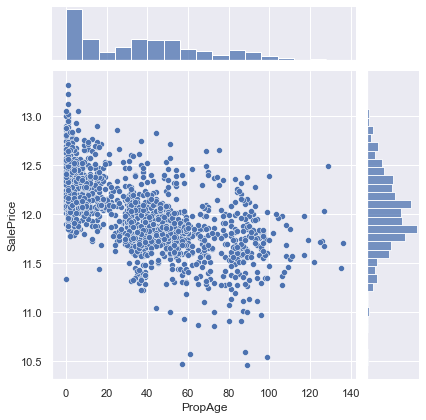

In [160]:
# PropAge vs SalePrice
sns.jointplot(x = data['PropAge'], y = data['SalePrice'])
plt.show()

#### Increase in Property Age shows a decreasing saleprice trend i.e newer the property, high is the value

###  Now we can drop the column Month sold and Year Sold, Year built and Year remodelled since it will not be required further 

In [161]:
data = data.drop(['MoSold'], axis = 1)
data = data.drop(['YrSold'], axis = 1)
data = data.drop(['YearBuilt'], axis = 1)
data = data.drop(['YearRemodAdd'], axis = 1)
data.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave  none      Reg   
1   2          20       RL         80.0     9600   Pave  none      Reg   
2   3          60       RL         68.0    11250   Pave  none      IR1   
3   4          70       RL         60.0     9550   Pave  none      IR1   
4   5          60       RL         84.0    14260   Pave  none      IR1   

  LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
0         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
1         Lvl    AllPub       FR2       Gtl      Veenker      Feedr   
2         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
3         Lvl    AllPub    Corner       Gtl      Crawfor       Norm   
4         Lvl    AllPub       FR2       Gtl      NoRidge       Norm   

  Condition2 BldgType HouseStyle  OverallQual  OverallCond RoofStyle RoofMatl  \
0       Norm     1Fam     2Story            7            5     Gable  CompShg   
1       Norm     1Fam     1Story            6            8     Gable  CompShg   
2       Norm     1Fam     2Story            7            5     Gable  CompShg   
3       Norm     1Fam     2Story            7            5     Gable  CompShg   
4       Norm     1Fam     2Story            8            5     Gable  CompShg   

  Exterior1st Exterior2nd MasVnrType  MasVnrArea ExterQual ExterCond  \
0     VinylSd     VinylSd    BrkFace       196.0        Gd        TA   
1     MetalSd     MetalSd       None         0.0        TA        TA   
2     VinylSd     VinylSd    BrkFace       162.0        Gd        TA   
3     Wd Sdng     Wd Shng       None         0.0        TA        TA   
4     VinylSd     VinylSd    BrkFace       350.0        Gd        TA   

  Foundation BsmtQual BsmtCond BsmtExposure BsmtFinType1  BsmtFinSF1  \
0      PConc       Gd       TA           No          GLQ         706   
1     CBlock       Gd       TA           Gd          ALQ         978   
2      PConc       Gd       TA           Mn          GLQ         486   
3     BrkTil       TA       Gd           No          ALQ         216   
4      PConc       Gd       TA           Av          GLQ         655   

  BsmtFinType2  BsmtFinSF2  TotalBsmtSF Heating HeatingQC CentralAir  \
0          Unf           0          856    GasA        Ex          Y   
1          Unf           0         1262    GasA        Ex          Y   
2          Unf           0          920    GasA        Ex          Y   
3          Unf           0          756    GasA        Gd          Y   
4          Unf           0         1145    GasA        Ex          Y   

  Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  BsmtFullBath  \
0      SBrkr       856       854             0       1710             1   
1      SBrkr      1262         0             0       1262             0   
2      SBrkr       920       866             0       1786             1   
3      SBrkr       961       756             0       1717             1   
4      SBrkr      1145      1053             0       2198             1   

   BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr KitchenQual  \
0             0         2         1             3             1          Gd   
1             1         2         0             3             1          TA   
2             0         2         1             3             1          Gd   
3             0         1         0             3             1          Gd   
4             0         2         1             4             1          Gd   

  Functional  Fireplaces FireplaceQu GarageType GarageFinish  GarageArea  \
0        Typ           0        none     Attchd          RFn         548   
1        Typ           1          TA     Attchd          RFn         460   
2        Typ           1          TA     Attchd          RFn         608   
3        Typ           1          Gd     Detchd          Unf         642   
4        Typ           1          TA   

In [162]:
data.Street.value_counts()

Pave    1423
Grvl       6
Name: Street, dtype: int64

In [163]:
data.Utilities.value_counts()

AllPub    1428
NoSeWa       1
Name: Utilities, dtype: int64

In [164]:
# We can also drop columns that show very low variance and thus not required for predictions
data = data.drop(['Street'], axis = 1)
data = data.drop(['Utilities'], axis = 1)

### Just to check the variance of these columns 

In [165]:

# l1 = ['Condition2', 'Heating', 'PoolQC', 'RoofMatl', 'BsmtCond', 'GarageQual', 'GarageCond', 'MiscVal', '3SsnPorch', 'FireplaceQu', 'BsmtHalfBath', 'BsmtFinSF2', 'Alley', 'MiscFeature', 'Fence', 'Functional']
l2= data.select_dtypes(include=['float64', 'int64'])
l2



Id  MSSubClass  LotFrontage  LotArea  OverallQual  OverallCond  \
0        1          60         65.0     8450            7            5   
1        2          20         80.0     9600            6            8   
2        3          60         68.0    11250            7            5   
3        4          70         60.0     9550            7            5   
4        5          60         84.0    14260            8            5   
5        6          50         85.0    14115            5            5   
6        7          20         75.0    10084            8            5   
7        8          60         80.0    10382            7            6   
8        9          50         51.0     6120            7            5   
9       10         190         50.0     7420            5            6   
10      11          20         70.0    11200            5            5   
11      12          60         85.0    11924            9            5   
12      13          20         71.0    12968            5            6   
13      14          20         91.0    10652            7            5   
14      15          20         73.0    10920            6            5   
15      16          45         51.0     6120            7            8   
16      17          20         73.0    11241            6            7   
17      18          90         72.0    10791            4            5   
18      19          20         66.0    13695            5            5   
19      20          20         70.0     7560            5            6   
20      21          60        101.0    14215            8            5   
21      22          45         57.0     7449            7            7   
22      23          20         75.0     9742            8            5   
23      24         120         44.0     4224            5            7   
24      25          20         71.0     8246            5            8   
25      26          20        110.0    14230            8            5   
26      27          20         60.0     7200            5            7   
27      28          20         98.0    11478            8            5   
28      29          20         47.0    16321            5            6   
29      30          30         60.0     6324            4            6   
30      31          70         50.0     8500            4            4   
31      32          20         71.0     8544            5            6   
32      33          20         85.0    11049            8            5   
33      34          20         70.0    10552            5            5   
34      35         120         60.0     7313            9            5   
35      36          60        108.0    13418            8            5   
36      37          20        112.0    10859            5            5   
37      38          20         74.0     8532            5            6   
38      39          20         68.0     7922            5            7   
39      40          90         65.0     6040            4            5   
40      41          20         84.0     8658            6            5   
41      42          20        115.0    16905            5            6   
42      43          85         66.5     9180            5            7   
43      44          20         70.0     9200            5            6   
44      45          20         70.0     7945            5            6   
45      46         120         61.0     7658            9            5   
46      47          50         48.0    12822            7            5   
47      48          20         84.0    11096            8            5   
48      49         190         33.0     4456            4            5   
49      50          20         66.0     7742            5            7   
50      51          60         65.0    13869            6            6   
51      52          50         52.0     6240            6            6   
52      53          90        110.0     8472            5            5   
53      54  

In [166]:
for i in l2:
    print(data[i].value_counts())

1       1
956     1
977     1
976     1
975     1
974     1
973     1
972     1
971     1
970     1
969     1
968     1
967     1
966     1
965     1
964     1
963     1
961     1
960     1
959     1
958     1
978     1
979     1
980     1
991     1
999     1
998     1
997     1
996     1
995     1
994     1
993     1
992     1
990     1
981     1
989     1
988     1
987     1
986     1
985     1
984     1
983     1
982     1
957     1
955     1
911     1
954     1
931     1
930     1
929     1
928     1
927     1
926     1
925     1
924     1
923     1
922     1
921     1
920     1
919     1
918     1
917     1
916     1
915     1
914     1
913     1
932     1
933     1
934     1
945     1
953     1
952     1
951     1
950     1
949     1
948     1
947     1
946     1
944     1
935     1
943     1
942     1
941     1
940     1
939     1
938     1
937     1
936     1
1000    1
1001    1
1002    1
1003    1
1069    1
1068    1
1067    1
1066    1
1065    1
1064    1
1063    1
1062    1


In [167]:
data.shape

(1429, 72)

# Step 3: Data Preparation


### Dropping fields which are redundant or wont add any value to the model

In [168]:
# Drop 'Id' from Dataframe

data = data.drop(['Id'], axis=1)
data.head()

MSSubClass MSZoning  LotFrontage  LotArea Alley LotShape LandContour  \
0          60       RL         65.0     8450  none      Reg         Lvl   
1          20       RL         80.0     9600  none      Reg         Lvl   
2          60       RL         68.0    11250  none      IR1         Lvl   
3          70       RL         60.0     9550  none      IR1         Lvl   
4          60       RL         84.0    14260  none      IR1         Lvl   

  LotConfig LandSlope Neighborhood Condition1 Condition2 BldgType HouseStyle  \
0    Inside       Gtl      CollgCr       Norm       Norm     1Fam     2Story   
1       FR2       Gtl      Veenker      Feedr       Norm     1Fam     1Story   
2    Inside       Gtl      CollgCr       Norm       Norm     1Fam     2Story   
3    Corner       Gtl      Crawfor       Norm       Norm     1Fam     2Story   
4       FR2       Gtl      NoRidge       Norm       Norm     1Fam     2Story   

   OverallQual  OverallCond RoofStyle RoofMatl Exterior1st Exterior2nd  \
0            7            5     Gable  CompShg     VinylSd     VinylSd   
1            6            8     Gable  CompShg     MetalSd     MetalSd   
2            7            5     Gable  CompShg     VinylSd     VinylSd   
3            7            5     Gable  CompShg     Wd Sdng     Wd Shng   
4            8            5     Gable  CompShg     VinylSd     VinylSd   

  MasVnrType  MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond  \
0    BrkFace       196.0        Gd        TA      PConc       Gd       TA   
1       None         0.0        TA        TA     CBlock       Gd       TA   
2    BrkFace       162.0        Gd        TA      PConc       Gd       TA   
3       None         0.0        TA        TA     BrkTil       TA       Gd   
4    BrkFace       350.0        Gd        TA      PConc       Gd       TA   

  BsmtExposure BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  TotalBsmtSF  \
0           No          GLQ         706          Unf           0          856   
1           Gd          ALQ         978          Unf           0         1262   
2           Mn          GLQ         486          Unf           0          920   
3           No          ALQ         216          Unf           0          756   
4           Av          GLQ         655          Unf           0         1145   

  Heating HeatingQC CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  \
0    GasA        Ex          Y      SBrkr       856       854             0   
1    GasA        Ex          Y      SBrkr      1262         0             0   
2    GasA        Ex          Y      SBrkr       920       866             0   
3    GasA        Gd          Y      SBrkr       961       756             0   
4    GasA        Ex          Y      SBrkr      1145      1053             0   

   GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  \
0       1710             1             0         2         1             3   
1       1262             0             1         2         0             3   
2       1786             1             0         2         1             3   
3       1717             1             0         1         0             3   
4       2198             1             0         2         1             4   

   KitchenAbvGr KitchenQual Functional  Fireplaces FireplaceQu GarageType  \
0             1          Gd        Typ           0        none     Attchd   
1             1          TA        Typ           1          TA     Attchd   
2             1          Gd        Typ           1          TA     Attchd   
3             1          Gd        Typ           1          Gd     Detchd   
4             1          Gd        Typ           1          TA     Attchd   

  GarageFinish  GarageArea GarageQual GarageCond PavedDrive  WoodDeckSF  \
0          RFn         548         TA         TA          Y           0   
1          RFn         460         TA         TA          Y         298   
2          RFn         608         TA       

In [169]:
 data = data.drop(['PoolQC','MiscVal', 'Alley', 'RoofMatl', 'Condition2', 'Heating', 'GarageCond', 'Fence', 'Functional' ], axis = 1)

### Above columns have higher null values, even after imputing, they offered very little variance in the data. Hence dropping.

In [170]:
#type of each feature in data: int, float, object
types = data.dtypes
#numerical values are either type int or float
numeric_type = types[(types == 'int64') | (types == float)] 
#categorical values are type object
categorical_type = types[types == object]

In [171]:
pd.DataFrame(types).reset_index().set_index(0).reset_index()[0].value_counts()

object     33
int64      26
float64     3
Name: 0, dtype: int64

In [172]:
#we should convert numeric_type to a list to make it easier to work with
numerical_columns = list(numeric_type.index)
print(numerical_columns)

['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'Fireplaces', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'SalePrice', 'PropAge']


In [173]:
#Categorical columns
categorical_columns = list(categorical_type.index)
print(categorical_columns)

['MSZoning', 'LotShape', 'LandContour', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'BldgType', 'HouseStyle', 'RoofStyle', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'PavedDrive', 'MiscFeature', 'SaleType', 'SaleCondition']


### Creating Dummy columns to convert categorical into numerical

In [174]:
data = pd.get_dummies(data, drop_first=True )
data.head()

MSSubClass  LotFrontage  LotArea  OverallQual  OverallCond  MasVnrArea  \
0          60         65.0     8450            7            5       196.0   
1          20         80.0     9600            6            8         0.0   
2          60         68.0    11250            7            5       162.0   
3          70         60.0     9550            7            5         0.0   
4          60         84.0    14260            8            5       350.0   

   BsmtFinSF1  BsmtFinSF2  TotalBsmtSF  1stFlrSF  2ndFlrSF  LowQualFinSF  \
0         706           0          856       856       854             0   
1         978           0         1262      1262         0             0   
2         486           0          920       920       866             0   
3         216           0          756       961       756             0   
4         655           0         1145      1145      1053             0   

   GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  \
0       1710             1             0         2         1             3   
1       1262             0             1         2         0             3   
2       1786             1             0         2         1             3   
3       1717             1             0         1         0             3   
4       2198             1             0         2         1             4   

   KitchenAbvGr  Fireplaces  GarageArea  WoodDeckSF  OpenPorchSF  \
0             1           0         548           0           61   
1             1           1         460         298            0   
2             1           1         608           0           42   
3             1           1         642           0           35   
4             1           1         836         192           84   

   EnclosedPorch  3SsnPorch  ScreenPorch  PoolArea  SalePrice  PropAge  \
0              0          0            0         0  12.247699        5   
1              0          0            0         0  12.109016       31   
2              0          0            0         0  12.317171        7   
3            272          0            0         0  11.849405       91   
4              0          0            0         0  12.429220        8   

   MSZoning_FV  MSZoning_RH  MSZoning_RL  MSZoning_RM  LotShape_IR2  \
0            0            0            1            0             0   
1            0            0            1            0             0   
2            0            0            1            0             0   
3            0            0            1            0             0   
4            0            0            1            0             0   

   LotShape_IR3  LotShape_Reg  LandContour_HLS  LandContour_Low  \
0             0             1                0                0   
1             0             1                0                0   
2             0             0                0                0   
3             0             0                0                0   
4             0             0                0                0   

   LandContour_Lvl  LotConfig_CulDSac  LotConfig_FR2  LotConfig_FR3  \
0                1                  0              0              0   
1                1                  0              1              0   
2                1                  0              0              0   
3                1                  0              0              0   
4                1                  0              1              0   

   LotConfig_Inside  LandSlope_Mod  LandSlope_Sev  Neighborhood_Blueste  \
0                 1              0              0                     0   
1                 0              0              0                     0   
2                 1              0              0                     0   
3                 0              0              0                     0   
4                 0              0              0                     0   

   Neighborhood_BrDale  Neighborhood_BrkSide  Neighb

In [175]:
X = data.drop(['SalePrice'], axis=1)

X.head()

MSSubClass  LotFrontage  LotArea  OverallQual  OverallCond  MasVnrArea  \
0          60         65.0     8450            7            5       196.0   
1          20         80.0     9600            6            8         0.0   
2          60         68.0    11250            7            5       162.0   
3          70         60.0     9550            7            5         0.0   
4          60         84.0    14260            8            5       350.0   

   BsmtFinSF1  BsmtFinSF2  TotalBsmtSF  1stFlrSF  2ndFlrSF  LowQualFinSF  \
0         706           0          856       856       854             0   
1         978           0         1262      1262         0             0   
2         486           0          920       920       866             0   
3         216           0          756       961       756             0   
4         655           0         1145      1145      1053             0   

   GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  \
0       1710             1             0         2         1             3   
1       1262             0             1         2         0             3   
2       1786             1             0         2         1             3   
3       1717             1             0         1         0             3   
4       2198             1             0         2         1             4   

   KitchenAbvGr  Fireplaces  GarageArea  WoodDeckSF  OpenPorchSF  \
0             1           0         548           0           61   
1             1           1         460         298            0   
2             1           1         608           0           42   
3             1           1         642           0           35   
4             1           1         836         192           84   

   EnclosedPorch  3SsnPorch  ScreenPorch  PoolArea  PropAge  MSZoning_FV  \
0              0          0            0         0        5            0   
1              0          0            0         0       31            0   
2              0          0            0         0        7            0   
3            272          0            0         0       91            0   
4              0          0            0         0        8            0   

   MSZoning_RH  MSZoning_RL  MSZoning_RM  LotShape_IR2  LotShape_IR3  \
0            0            1            0             0             0   
1            0            1            0             0             0   
2            0            1            0             0             0   
3            0            1            0             0             0   
4            0            1            0             0             0   

   LotShape_Reg  LandContour_HLS  LandContour_Low  LandContour_Lvl  \
0             1                0                0                1   
1             1                0                0                1   
2             0                0                0                1   
3             0                0                0                1   
4             0                0                0                1   

   LotConfig_CulDSac  LotConfig_FR2  LotConfig_FR3  LotConfig_Inside  \
0                  0              0              0                 1   
1                  0              1              0                 0   
2                  0              0              0                 1   
3                  0              0              0                 0   
4                  0              1              0                 0   

   LandSlope_Mod  LandSlope_Sev  Neighborhood_Blueste  Neighborhood_BrDale  \
0              0              0                     0                    0   
1              0              0                     0                    0   
2              0              0                     0                    0   
3              0              0                     0                    0   
4              0              0                     0                  

In [176]:
# Putting response variable to y
y = data['SalePrice']

y.head()

0    12.247699
1    12.109016
2    12.317171
3    11.849405
4    12.429220
Name: SalePrice, dtype: float64

In [177]:
# Splitting the data into train and test
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=50)

In [178]:
from sklearn.preprocessing import StandardScaler

In [179]:
scaler = StandardScaler()

X_train[['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'Fireplaces', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'PropAge']] = scaler.fit_transform(X_train[['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'Fireplaces', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'PropAge']])

X_test[['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'Fireplaces', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'PropAge']] = scaler.fit_transform(X_test[['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'Fireplaces', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'PropAge']])



In [180]:
X_train.head()

MSSubClass  LotFrontage   LotArea  OverallQual  OverallCond  MasVnrArea  \
11      0.085645     0.746261  0.154684     2.241710    -0.513939    1.145212   
1070   -0.869945     0.130905 -0.020017    -0.764271    -0.513939    0.152993   
513    -0.869945     0.083570 -0.115156    -0.012775    -0.513939   -0.564274   
467     0.324542     0.462250 -0.086269    -0.764271     1.258264    0.774624   
993     0.085645    -0.058435 -0.148775    -0.012775    -0.513939   -0.564274   

      BsmtFinSF1  BsmtFinSF2  TotalBsmtSF  1stFlrSF  2ndFlrSF  LowQualFinSF  \
11      1.323938   -0.300737     0.345478  0.113320  1.995226     -0.111211   
1070    0.360916   -0.300737     0.030191 -0.267693 -0.769750     -0.111211   
513    -0.223442   -0.300737     0.119563 -0.176705 -0.769750     -0.111211   
467    -0.106571   -0.300737    -0.764234 -0.722635  1.060654     -0.111211   
993    -1.008820   -0.300737    -0.709617 -1.115022  1.046127     -0.111211   

      GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  \
11     1.923409      1.131973     -0.250936  2.754667 -0.727119      1.478865   
1070  -0.932170      1.131973     -0.250936 -0.990631 -0.727119      0.212713   
513   -0.860557     -0.816345     -0.250936 -0.990631  1.275964      0.212713   
467    0.401627     -0.816345     -0.250936 -0.990631  1.275964      0.212713   
993    0.079368     -0.816345     -0.250936  0.882018  1.275964      0.212713   

      KitchenAbvGr  Fireplaces  GarageArea  WoodDeckSF  OpenPorchSF  \
11       -0.222797    2.231812    1.267298    0.485675    -0.351334   
1070     -0.222797   -0.918240   -0.857140   -0.758474    -0.368801   
513      -0.222797   -0.918240    0.077613    0.257158    -0.718144   
467      -0.222797    2.231812   -0.734395    0.663411    -0.718144   
993      -0.222797   -0.918240    0.455291   -0.758474    -0.106794   

      EnclosedPorch  3SsnPorch  ScreenPorch  PoolArea   PropAge  MSZoning_FV  \
11        -0.378185  -0.115383    -0.268919 -0.054574 -1.209026            0   
1070      -0.378185  -0.115383     3.351363 -0.054574  0.445587            0   
513        2.265177  -0.115383    -0.268919 -0.054574 -0.447904            0   
467       -0.378185  -0.115383    -0.268919 -0.054574  0.908879            0   
993       -0.378185  -0.115383    -0.268919 -0.054574 -1.209026            0   

      MSZoning_RH  MSZoning_RL  MSZoning_RM  LotShape_IR2  LotShape_IR3  \
11              0            1            0             0             0   
1070            0            1            0             0             0   
513             0            1            0             0             0   
467             0            1            0             0             0   
993             0            1            0             0             0   

      LotShape_Reg  LandContour_HLS  LandContour_Low  LandContour_Lvl  \
11               0                0                0                1   
1070             1                0                0                1   
513              1                0                0                0   
467              1                0                0                1   
993              1                0                0                1   

      LotConfig_CulDSac  LotConfig_FR2  LotConfig_FR3  LotConfig_Inside  \
11                    0              0              0                 1   
1070                  0              0              0                 1   
513                   0              0              0                 0   
467                   0              0              0                 1   
993                   0              0              0                 1   

      LandSlope_Mod  LandSlope_Sev  Neighborhood_Blueste  Neighborhood_BrDale  \
11                0              0                     0                    0   
1070              0              0                     0                    0   
513               0              0                     0         

In [181]:
X_test.head()

MSSubClass  LotFrontage    LotArea  OverallQual  OverallCond  \
461     0.282163    -0.495702  -0.339155     0.620334     3.325664   
335     3.002345     0.729276  17.009026    -0.825989     0.435637   
200    -0.851246     0.484280  -0.190859    -1.549150    -0.527705   
214     0.055482    -0.005711   0.068493    -0.102827     1.398980   
1003    0.735527     0.484280   0.134598    -0.825989     0.435637   

      MasVnrArea  BsmtFinSF1  BsmtFinSF2  TotalBsmtSF  1stFlrSF  2ndFlrSF  \
461    -0.606456   -0.211663    0.997135    -1.205047 -1.556925  0.506037   
335    -0.606456    1.881258    0.620602     1.075768  1.258064 -0.435654   
200    -0.606456   -1.026482   -0.257974     0.157612 -0.084718 -0.835813   
214     0.272709   -0.146477   -0.257974    -0.891708 -1.249541  0.848688   
1003    0.335917   -1.026482   -0.257974     1.515413  1.422541 -0.835813   

      LowQualFinSF  GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  \
461       -0.09698  -0.813247      1.073876     -0.215271 -1.099305 -0.803081   
335       -0.09698   0.616745      2.969732     -0.215271  0.802316 -0.803081   
200       -0.09698  -0.843999     -0.821980     -0.215271  0.802316 -0.803081   
214       -0.09698  -0.248718     -0.821980     -0.215271 -1.099305  1.176929   
1003      -0.09698   0.383905     -0.821980     -0.215271  0.802316 -0.803081   

      BedroomAbvGr  KitchenAbvGr  Fireplaces  GarageArea  WoodDeckSF  \
461       0.172438     -0.185172   -0.988037    0.530538    1.165362   
335       0.172438     -0.185172    2.151725    0.299231    4.227488   
200      -1.081391     -0.185172   -0.988037   -0.138775    0.248203   
214       0.172438     -0.185172   -0.988037   -0.832694   -0.728127   
1003      1.426267      4.779760   -0.988037    0.294310   -0.728127   

      OpenPorchSF  EnclosedPorch  3SsnPorch  ScreenPorch  PoolArea   PropAge  \
461     -0.747921      -0.328244  -0.127886     -0.27671       0.0  1.326790   
335     -0.747921      -0.328244  -0.127886     -0.27671       0.0  0.303675   
200      0.135073      -0.328244  -0.127886     -0.27671       0.0 -0.924063   
214     -0.251236      -0.328244  -0.127886     -0.27671       0.0 -0.037363   
1003    -0.747921      -0.328244  -0.127886     -0.27671       0.0 -0.105571   

      MSZoning_FV  MSZoning_RH  MSZoning_RL  MSZoning_RM  LotShape_IR2  \
461             0            0            1            0             0   
335             0            0            1            0             0   
200             0            0            0            1             0   
214             0            0            1            0             0   
1003            0            0            1            0             0   

      LotShape_IR3  LotShape_Reg  LandContour_HLS  LandContour_Low  \
461              0             1                0                0   
335              0             0                1                0   
200              0             1                0                0   
214              0             0                0                0   
1003             0             0                0                0   

      LandContour_Lvl  LotConfig_CulDSac  LotConfig_FR2  LotConfig_FR3  \
461                 1                  0              0              0   
335                 0                  0              0              0   
200                 1                  0              0              0   
214                 1                  0              1              0   
1003                1                  0              0              0   

      LotConfig_Inside  LandSlope_Mod  LandSlope_Sev  Neighborhood_Blueste  \
461                  1              0              0                     0   
335                  0              0              1                     0   
200                  0              0              0                     0   
214                  0              0              0                     0   
1003                

# Step 4: Model Building and Evaluation


### Create Regression Models and Evaluate performance to come up with final model to be handed over to business

<h3 style = "color : Brown">Model Creation using Linear Regression and RFE</h3>

In [182]:
# Importing RFE and LinearRegression
# Since there are more variables to be analysed, we will used the automated feature elimination process (RFE)

from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm

In [183]:
# Running RFE 
# Since there are more than 250 variables for analysis, we will run RFE to select some that have high predictive power
lm = LinearRegression()
lm.fit(X_train, y_train)
 # running RFE for top 100 variables
rfe = RFE(lm, 100)            
rfe = rfe.fit(X_train, y_train)

In [184]:
# Check the ranks
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('MSSubClass', False, 36),
 ('LotFrontage', False, 70),
 ('LotArea', True, 1),
 ('OverallQual', True, 1),
 ('OverallCond', True, 1),
 ('MasVnrArea', False, 94),
 ('BsmtFinSF1', True, 1),
 ('BsmtFinSF2', False, 77),
 ('TotalBsmtSF', True, 1),
 ('1stFlrSF', True, 1),
 ('2ndFlrSF', True, 1),
 ('LowQualFinSF', True, 1),
 ('GrLivArea', True, 1),
 ('BsmtFullBath', False, 54),
 ('BsmtHalfBath', False, 108),
 ('FullBath', False, 72),
 ('HalfBath', False, 67),
 ('BedroomAbvGr', False, 106),
 ('KitchenAbvGr', False, 96),
 ('Fireplaces', False, 110),
 ('GarageArea', False, 10),
 ('WoodDeckSF', False, 48),
 ('OpenPorchSF', False, 111),
 ('EnclosedPorch', False, 57),
 ('3SsnPorch', False, 88),
 ('ScreenPorch', False, 50),
 ('PoolArea', False, 74),
 ('PropAge', True, 1),
 ('MSZoning_FV', True, 1),
 ('MSZoning_RH', True, 1),
 ('MSZoning_RL', True, 1),
 ('MSZoning_RM', True, 1),
 ('LotShape_IR2', False, 95),
 ('LotShape_IR3', True, 1),
 ('LotShape_Reg', False, 105),
 ('LandContour_HLS', False, 38),
 

In [185]:
# Select the top 100 variables

col = X_train.columns[rfe.support_]
col

Index(['LotArea', 'OverallQual', 'OverallCond', 'BsmtFinSF1', 'TotalBsmtSF',
       '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'PropAge',
       'MSZoning_FV', 'MSZoning_RH', 'MSZoning_RL', 'MSZoning_RM',
       'LotShape_IR3', 'LotConfig_FR3', 'LandSlope_Sev',
       'Neighborhood_ClearCr', 'Neighborhood_Crawfor', 'Neighborhood_Edwards',
       'Neighborhood_MeadowV', 'Neighborhood_NoRidge', 'Neighborhood_NridgHt',
       'Neighborhood_SWISU', 'Neighborhood_StoneBr', 'Neighborhood_Veenker',
       'Condition1_Feedr', 'Condition1_Norm', 'Condition1_PosN',
       'Condition1_RRAe', 'Condition1_RRAn', 'Condition1_RRNn',
       'BldgType_Twnhs', 'HouseStyle_2.5Fin', 'RoofStyle_Gable',
       'RoofStyle_Gambrel', 'RoofStyle_Hip', 'RoofStyle_Mansard',
       'Exterior1st_AsphShn', 'Exterior1st_BrkComm', 'Exterior1st_CBlock',
       'Exterior1st_CemntBd', 'Exterior1st_HdBoard', 'Exterior1st_Plywood',
       'Exterior1st_VinylSd', 'Exterior1st_Wd Sdng', 'Exterior1st_WdShing',
      

In [186]:
X_train.columns[~rfe.support_]

Index(['MSSubClass', 'LotFrontage', 'MasVnrArea', 'BsmtFinSF2', 'BsmtFullBath',
       'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr',
       ...
       'GarageQual_Gd', 'PavedDrive_P', 'PavedDrive_Y', 'MiscFeature_Othr',
       'SaleType_ConLw', 'SaleType_New', 'SaleType_Oth', 'SaleType_WD',
       'SaleCondition_Alloca', 'SaleCondition_Family'],
      dtype='object', length=110)

In [187]:
# Creating X_test dataframe with RFE selected variables
X_train_rfe = X_train[col]

In [188]:
X_train_rfe = pd.DataFrame(X_train[col])

In [189]:
X_train_rfe.head()

LotArea  OverallQual  OverallCond  BsmtFinSF1  TotalBsmtSF  1stFlrSF  \
11    0.154684     2.241710    -0.513939    1.323938     0.345478  0.113320   
1070 -0.020017    -0.764271    -0.513939    0.360916     0.030191 -0.267693   
513  -0.115156    -0.012775    -0.513939   -0.223442     0.119563 -0.176705   
467  -0.086269    -0.764271     1.258264   -0.106571    -0.764234 -0.722635   
993  -0.148775    -0.012775    -0.513939   -1.008820    -0.709617 -1.115022   

      2ndFlrSF  LowQualFinSF  GrLivArea   PropAge  MSZoning_FV  MSZoning_RH  \
11    1.995226     -0.111211   1.923409 -1.209026            0            0   
1070 -0.769750     -0.111211  -0.932170  0.445587            0            0   
513  -0.769750     -0.111211  -0.860557 -0.447904            0            0   
467   1.060654     -0.111211   0.401627  0.908879            0            0   
993   1.046127     -0.111211   0.079368 -1.209026            0            0   

      MSZoning_RL  MSZoning_RM  LotShape_IR3  LotConfig_FR3  LandSlope_Sev  \
11              1            0             0              0              0   
1070            1            0             0              0              0   
513             1            0             0              0              0   
467             1            0             0              0              0   
993             1            0             0              0              0   

      Neighborhood_ClearCr  Neighborhood_Crawfor  Neighborhood_Edwards  \
11                       0                     0                     0   
1070                     0                     0                     0   
513                      0                     0                     0   
467                      0                     0                     0   
993                      0                     0                     0   

      Neighborhood_MeadowV  Neighborhood_NoRidge  Neighborhood_NridgHt  \
11                       0                     0                     1   
1070                     0                     0                     0   
513                      0                     0                     0   
467                      0                     0                     0   
993                      0                     0                     0   

      Neighborhood_SWISU  Neighborhood_StoneBr  Neighborhood_Veenker  \
11                     0                     0                     0   
1070                   0                     0                     0   
513                    0                     0                     0   
467                    0                     0                     0   
993                    0                     0                     0   

      Condition1_Feedr  Condition1_Norm  Condition1_PosN  Condition1_RRAe  \
11                   0                1                0                0   
1070                 0                1                0                0   
513                  0                1                0                0   
467                  0                0                0                0   
993                  0                1                0                0   

      Condition1_RRAn  Condition1_RRNn  BldgType_Twnhs  HouseStyle_2.5Fin  \
11                  0                0               0                  0   
1070                0                0               0                  0   
513                 0                0               0                  0   
467                 0                0               0                  0   
993                 0                0               0                  0   

      RoofStyle_Gable  RoofStyle_Gambrel  RoofStyle_Hip  RoofStyle_Mansard  \
11                  0                  0              1                  0   
1070                0                  0              1                  0   
513                 1                  0              0                  0   
467                 1      

In [190]:
X_train_rfe.shape

(1000, 100)

In [191]:
# predict
y_train_pred = lm.predict(X_train)
metrics.r2_score(y_true=y_train, y_pred=y_train_pred)

0.9397600011839012

In [192]:
y_test_pred = lm.predict(X_test)
metrics.r2_score(y_true=y_test, y_pred=y_test_pred)

-1.2282325515814912e+20

## Since the Test R2 is too low, we will check for some alternate methods of Regression

In [193]:
# Check the ranks
list(zip(X_test.columns,rfe.support_,rfe.ranking_))

[('MSSubClass', False, 36),
 ('LotFrontage', False, 70),
 ('LotArea', True, 1),
 ('OverallQual', True, 1),
 ('OverallCond', True, 1),
 ('MasVnrArea', False, 94),
 ('BsmtFinSF1', True, 1),
 ('BsmtFinSF2', False, 77),
 ('TotalBsmtSF', True, 1),
 ('1stFlrSF', True, 1),
 ('2ndFlrSF', True, 1),
 ('LowQualFinSF', True, 1),
 ('GrLivArea', True, 1),
 ('BsmtFullBath', False, 54),
 ('BsmtHalfBath', False, 108),
 ('FullBath', False, 72),
 ('HalfBath', False, 67),
 ('BedroomAbvGr', False, 106),
 ('KitchenAbvGr', False, 96),
 ('Fireplaces', False, 110),
 ('GarageArea', False, 10),
 ('WoodDeckSF', False, 48),
 ('OpenPorchSF', False, 111),
 ('EnclosedPorch', False, 57),
 ('3SsnPorch', False, 88),
 ('ScreenPorch', False, 50),
 ('PoolArea', False, 74),
 ('PropAge', True, 1),
 ('MSZoning_FV', True, 1),
 ('MSZoning_RH', True, 1),
 ('MSZoning_RL', True, 1),
 ('MSZoning_RM', True, 1),
 ('LotShape_IR2', False, 95),
 ('LotShape_IR3', True, 1),
 ('LotShape_Reg', False, 105),
 ('LandContour_HLS', False, 38),
 

In [194]:
# Select the top 100 variables

col1 = X_test.columns[rfe.support_]
col1

Index(['LotArea', 'OverallQual', 'OverallCond', 'BsmtFinSF1', 'TotalBsmtSF',
       '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'PropAge',
       'MSZoning_FV', 'MSZoning_RH', 'MSZoning_RL', 'MSZoning_RM',
       'LotShape_IR3', 'LotConfig_FR3', 'LandSlope_Sev',
       'Neighborhood_ClearCr', 'Neighborhood_Crawfor', 'Neighborhood_Edwards',
       'Neighborhood_MeadowV', 'Neighborhood_NoRidge', 'Neighborhood_NridgHt',
       'Neighborhood_SWISU', 'Neighborhood_StoneBr', 'Neighborhood_Veenker',
       'Condition1_Feedr', 'Condition1_Norm', 'Condition1_PosN',
       'Condition1_RRAe', 'Condition1_RRAn', 'Condition1_RRNn',
       'BldgType_Twnhs', 'HouseStyle_2.5Fin', 'RoofStyle_Gable',
       'RoofStyle_Gambrel', 'RoofStyle_Hip', 'RoofStyle_Mansard',
       'Exterior1st_AsphShn', 'Exterior1st_BrkComm', 'Exterior1st_CBlock',
       'Exterior1st_CemntBd', 'Exterior1st_HdBoard', 'Exterior1st_Plywood',
       'Exterior1st_VinylSd', 'Exterior1st_Wd Sdng', 'Exterior1st_WdShing',
      

In [195]:
X_test_rfe = X_test[col1]

In [196]:
X_test_rfe.head()

LotArea  OverallQual  OverallCond  BsmtFinSF1  TotalBsmtSF  1stFlrSF  \
461   -0.339155     0.620334     3.325664   -0.211663    -1.205047 -1.556925   
335   17.009026    -0.825989     0.435637    1.881258     1.075768  1.258064   
200   -0.190859    -1.549150    -0.527705   -1.026482     0.157612 -0.084718   
214    0.068493    -0.102827     1.398980   -0.146477    -0.891708 -1.249541   
1003   0.134598    -0.825989     0.435637   -1.026482     1.515413  1.422541   

      2ndFlrSF  LowQualFinSF  GrLivArea   PropAge  MSZoning_FV  MSZoning_RH  \
461   0.506037      -0.09698  -0.813247  1.326790            0            0   
335  -0.435654      -0.09698   0.616745  0.303675            0            0   
200  -0.835813      -0.09698  -0.843999 -0.924063            0            0   
214   0.848688      -0.09698  -0.248718 -0.037363            0            0   
1003 -0.835813      -0.09698   0.383905 -0.105571            0            0   

      MSZoning_RL  MSZoning_RM  LotShape_IR3  LotConfig_FR3  LandSlope_Sev  \
461             1            0             0              0              0   
335             1            0             0              0              1   
200             0            1             0              0              0   
214             1            0             0              0              0   
1003            1            0             0              0              0   

      Neighborhood_ClearCr  Neighborhood_Crawfor  Neighborhood_Edwards  \
461                      0                     0                     0   
335                      0                     0                     0   
200                      0                     0                     1   
214                      0                     0                     0   
1003                     0                     0                     0   

      Neighborhood_MeadowV  Neighborhood_NoRidge  Neighborhood_NridgHt  \
461                      0                     0                     0   
335                      0                     0                     0   
200                      0                     0                     0   
214                      0                     0                     0   
1003                     0                     0                     0   

      Neighborhood_SWISU  Neighborhood_StoneBr  Neighborhood_Veenker  \
461                    1                     0                     0   
335                    0                     0                     0   
200                    0                     0                     0   
214                    0                     0                     0   
1003                   0                     0                     0   

      Condition1_Feedr  Condition1_Norm  Condition1_PosN  Condition1_RRAe  \
461                  1                0                0                0   
335                  0                1                0                0   
200                  0                1                0                0   
214                  0                1                0                0   
1003                 1                0                0                0   

      Condition1_RRAn  Condition1_RRNn  BldgType_Twnhs  HouseStyle_2.5Fin  \
461                 0                0               0                  0   
335                 0                0               0                  0   
200                 0                0               0                  0   
214                 0                0               0                  0   
1003                0                0               0                  0   

      RoofStyle_Gable  RoofStyle_Gambrel  RoofStyle_Hip  RoofStyle_Mansard  \
461                 1                  0              0                  0   
335                 1                  0              0                  0   
200                 1                  0              0                  0   
214                 1 

<h3 style = "color : Brown">Model Creation using Lasso Regression</h3>

In [197]:
# Checking the dimension of X_train & y_train
print("X_train", X_train.shape)
print("y_train", y_train.shape)

X_train (1000, 210)
y_train (1000,)


In [198]:
# Applying Lasso

# list of alphas to tune
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]}
lasso = Lasso()

# cross validation
folds = 5
model_cv_lasso = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

model_cv_lasso.fit(X_train, y_train) 

Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [199]:
model_cv_lasso.best_params_

{'alpha': 0.001}

In [200]:
alpha = 0.001
lasso = Lasso(alpha=alpha)

lasso.fit(X_train, y_train)
lasso.coef_

array([-9.65321317e-03,  1.18988626e-02,  1.93751557e-02,  8.36559202e-02,
        5.71689422e-02,  9.45115383e-04,  3.64282688e-02,  4.63396338e-03,
        3.78452192e-02,  0.00000000e+00,  0.00000000e+00, -2.30492221e-03,
        1.27215104e-01,  1.30500126e-02, -0.00000000e+00,  5.71784819e-03,
        8.02902526e-03, -2.56304540e-03, -7.57657423e-03,  1.04508649e-02,
        2.84522012e-02,  1.32554732e-02,  0.00000000e+00,  9.23829878e-03,
        4.73910841e-03,  1.31661990e-02,  8.94403220e-03, -8.17269407e-02,
        4.56394086e-02,  0.00000000e+00,  4.96327927e-02, -0.00000000e+00,
        0.00000000e+00, -0.00000000e+00, -2.88653722e-03,  0.00000000e+00,
       -0.00000000e+00,  0.00000000e+00,  2.28106950e-03, -0.00000000e+00,
       -0.00000000e+00, -1.82170052e-02,  0.00000000e+00, -0.00000000e+00,
       -0.00000000e+00, -0.00000000e+00,  2.07515858e-02,  0.00000000e+00,
       -0.00000000e+00,  9.49305114e-02, -1.30356967e-02, -0.00000000e+00,
       -4.80764023e-02, -

#### The advantage of this technique is clearly visible here as Lasso brings the coefficients of insignificant features to zero

In [201]:
print("Number of non-zero Coefficients for Original Lasso model {}".format(np.sum(lasso.coef_!=0)))

Number of non-zero Coefficients for Original Lasso model 69


In [202]:
# lasso model parameters
model_parameters = list(lasso.coef_ )
model_parameters.insert(0, lasso.intercept_)
model_parameters = [round(x, 3) for x in model_parameters]
cols = X.columns
cols = cols.insert(0, "constant")
list(zip(cols, model_parameters))

[('constant', 11.828),
 ('MSSubClass', -0.01),
 ('LotFrontage', 0.012),
 ('LotArea', 0.019),
 ('OverallQual', 0.084),
 ('OverallCond', 0.057),
 ('MasVnrArea', 0.001),
 ('BsmtFinSF1', 0.036),
 ('BsmtFinSF2', 0.005),
 ('TotalBsmtSF', 0.038),
 ('1stFlrSF', 0.0),
 ('2ndFlrSF', 0.0),
 ('LowQualFinSF', -0.002),
 ('GrLivArea', 0.127),
 ('BsmtFullBath', 0.013),
 ('BsmtHalfBath', -0.0),
 ('FullBath', 0.006),
 ('HalfBath', 0.008),
 ('BedroomAbvGr', -0.003),
 ('KitchenAbvGr', -0.008),
 ('Fireplaces', 0.01),
 ('GarageArea', 0.028),
 ('WoodDeckSF', 0.013),
 ('OpenPorchSF', 0.0),
 ('EnclosedPorch', 0.009),
 ('3SsnPorch', 0.005),
 ('ScreenPorch', 0.013),
 ('PoolArea', 0.009),
 ('PropAge', -0.082),
 ('MSZoning_FV', 0.046),
 ('MSZoning_RH', 0.0),
 ('MSZoning_RL', 0.05),
 ('MSZoning_RM', -0.0),
 ('LotShape_IR2', 0.0),
 ('LotShape_IR3', -0.0),
 ('LotShape_Reg', -0.003),
 ('LandContour_HLS', 0.0),
 ('LandContour_Low', -0.0),
 ('LandContour_Lvl', 0.0),
 ('LotConfig_CulDSac', 0.002),
 ('LotConfig_FR2', -0.0

In [203]:
# Lasso regression
lasso.fit(X_train, y_train)

# Prediction on the test set(Using R2)

y_train_pred = lasso.predict(X_train)
print('The R2 Score of the model on the TRAIN dataset :',metrics.r2_score(y_true=y_train, y_pred=y_train_pred))
y_test_pred = lasso.predict(X_test)
print('The R2 Score of the model on the TEST dataset :',metrics.r2_score(y_true=y_test, y_pred=y_test_pred))
print('The RMSE of the model on the test dataset :', np.sqrt(metrics.mean_squared_error(y_test, y_test_pred)))
print('The MSE of the model on the test dataset :', metrics.mean_squared_error(y_test, y_test_pred))
print('The MAE of the model on the test dataset :', metrics.mean_absolute_error(y_test, y_test_pred))

The R2 Score of the model on the TRAIN dataset : 0.9206709153542387
The R2 Score of the model on the TEST dataset : 0.9067784241823188
The RMSE of the model on the test dataset : 0.11546718823765788
The MSE of the model on the test dataset : 0.013332671559510716
The MAE of the model on the test dataset : 0.08327377518449156


In [204]:
#### The R2 values for Train and Test matches well, indicating an optimum model

In [205]:
# Creating a dataframe for the coefficients obtained from Lasso
mod = list(zip(cols, model_parameters))

In [206]:
para = pd.DataFrame(mod)
para.columns = ['Variable', 'Coeff']
para.head()

Variable   Coeff
0     constant  11.828
1   MSSubClass  -0.010
2  LotFrontage   0.012
3      LotArea   0.019
4  OverallQual   0.084

In [207]:
# sort the coefficients in ascending order
para = para.sort_values((['Coeff']), axis = 0, ascending = False)
para[:]

Variable   Coeff
0                 constant  11.828
13               GrLivArea   0.127
210  SaleCondition_Partial   0.116
50    Neighborhood_Crawfor   0.095
4              OverallQual   0.084
209   SaleCondition_Normal   0.060
5              OverallCond   0.057
31             MSZoning_RL   0.050
29             MSZoning_FV   0.046
70         Condition1_Norm   0.044
134       Foundation_PConc   0.038
9              TotalBsmtSF   0.038
7               BsmtFinSF1   0.036
95     Exterior1st_BrkFace   0.036
166           CentralAir_Y   0.033
146        BsmtExposure_Gd   0.029
21              GarageArea   0.028
66    Neighborhood_StoneBr   0.028
47    Neighborhood_BrkSide   0.021
100    Exterior1st_MetalSd   0.021
175         FireplaceQu_Gd   0.020
3                  LotArea   0.019
132           ExterCond_TA   0.015
65    Neighborhood_Somerst   0.014
22              WoodDeckSF   0.013
14            BsmtFullBath   0.013
26             ScreenPorch   0.013
124       MasVnrType_Stone   0.013
2              LotFrontage   0.012
20              Fireplaces   0.010
24           EnclosedPorch   0.009
27                PoolArea   0.009
179      GarageType_Attchd   0.009
150       BsmtFinType1_BLQ   0.009
17                HalfBath   0.008
60    Neighborhood_NridgHt   0.007
16                FullBath   0.006
151       BsmtFinType1_GLQ   0.005
25               3SsnPorch   0.005
8               BsmtFinSF2   0.005
183      GarageType_Detchd   0.002
39       LotConfig_CulDSac   0.002
197       MiscFeature_none   0.001
6               MasVnrArea   0.001
130           ExterCond_Gd  -0.000
125        MasVnrType_none  -0.000
145          BsmtCond_none   0.000
118     Exterior2nd_Stucco   0.000
147        BsmtExposure_Mn  -0.000
117      Exterior2nd_Stone   0.000
149      BsmtExposure_none   0.000
120    Exterior2nd_Wd Sdng   0.000
144            BsmtCond_TA   0.000
123        MasVnrType_None   0.000
121    Exterior2nd_Wd Shng  -0.000
152       BsmtFinType1_LwQ  -0.000
154       BsmtFinType1_Unf  -0.000
126           ExterQual_Fa  -0.000
142            BsmtCond_Gd   0.000
143            BsmtCond_Po  -0.000
131           ExterCond_Po   0.000
141          BsmtQual_none   0.000
138            BsmtQual_Fa   0.000
127           ExterQual_Gd   0.000
137        Foundation_Wood  -0.000
136       Foundation_Stone   0.000
128           ExterQual_TA  -0.000
135        Foundation_Slab   0.000
122     MasVnrType_BrkFace  -0.000
119    Exterior2nd_VinylSd   0.000
156       BsmtFinType2_BLQ  -0.000
133      Foundation_CBlock  -0.000
129           ExterCond_Fa  -0.000
155      BsmtFinType1_none   0.000
170       Electrical_SBrkr  -0.000
157       BsmtFinType2_GLQ   0.000
158       BsmtFinType2_LwQ  -0.000
190          GarageQual_Po  -0.000
191          GarageQual_TA   0.000
193           PavedDrive_P  -0.000
194           PavedDrive_Y   0.000
195       MiscFeature_Othr   0.000
196       MiscFeature_Shed  -0.000
198           SaleType_CWD   0.000
199           SaleType_Con   0.000
200         SaleType_ConLD   0.000
201         SaleType_ConLI  -0.000
202         SaleType_ConLw  -0.000
203           SaleType_New   0.000
204           SaleType_Oth   0.000
205            SaleType_WD  -0.000
206  SaleCondition_AdjLand   0.000
207   SaleCondition_Alloca  -0.000
208   SaleCondition_Family  -0.000
189          GarageQual_Gd   0.000
188          GarageQual_Fa  -0.000
186       GarageFinish_Unf   0.000
169         Electrical_Mix  -0.000
159       BsmtFinType2_Rec  -0.000
160       BsmtFinType2_Unf   0.000
161      BsmtFinType2_none   0.000
162           HeatingQC_Fa  -0.000
164           HeatingQC_Po  -0.000
167       Electrical_FuseF   0.000
168       Electrical_FuseP  -0.000
115      Exterior2nd_Other   0.000
185       GarageFinish_RFn  -0.000
171         KitchenQual_Fa  -0.000
174         FireplaceQu_Fa  -0.000
176         FireplaceQu_Po   0.000
177         FireplaceQu_TA  -0.000
180     GarageType_Basment  -0.000
181     GarageType_BuiltIn   0.000
182     GarageType_CarPort  

In [208]:
# Chose variables whose coefficients are non-zero
pred = pd.DataFrame(para[(para['Coeff'] != 0)])
pred = pred.sort_values((['Coeff']), axis = 0, ascending = False)
pred

Variable   Coeff
0                 constant  11.828
13               GrLivArea   0.127
210  SaleCondition_Partial   0.116
50    Neighborhood_Crawfor   0.095
4              OverallQual   0.084
209   SaleCondition_Normal   0.060
5              OverallCond   0.057
31             MSZoning_RL   0.050
29             MSZoning_FV   0.046
70         Condition1_Norm   0.044
134       Foundation_PConc   0.038
9              TotalBsmtSF   0.038
7               BsmtFinSF1   0.036
95     Exterior1st_BrkFace   0.036
166           CentralAir_Y   0.033
146        BsmtExposure_Gd   0.029
66    Neighborhood_StoneBr   0.028
21              GarageArea   0.028
100    Exterior1st_MetalSd   0.021
47    Neighborhood_BrkSide   0.021
175         FireplaceQu_Gd   0.020
3                  LotArea   0.019
132           ExterCond_TA   0.015
65    Neighborhood_Somerst   0.014
26             ScreenPorch   0.013
124       MasVnrType_Stone   0.013
14            BsmtFullBath   0.013
22              WoodDeckSF   0.013
2              LotFrontage   0.012
20              Fireplaces   0.010
24           EnclosedPorch   0.009
27                PoolArea   0.009
179      GarageType_Attchd   0.009
150       BsmtFinType1_BLQ   0.009
17                HalfBath   0.008
60    Neighborhood_NridgHt   0.007
16                FullBath   0.006
151       BsmtFinType1_GLQ   0.005
25               3SsnPorch   0.005
8               BsmtFinSF2   0.005
183      GarageType_Detchd   0.002
39       LotConfig_CulDSac   0.002
197       MiscFeature_none   0.001
6               MasVnrArea   0.001
178       FireplaceQu_none  -0.001
192        GarageQual_none  -0.001
12            LowQualFinSF  -0.002
163           HeatingQC_Gd  -0.002
105    Exterior1st_Wd Sdng  -0.002
98     Exterior1st_HdBoard  -0.002
139            BsmtQual_Gd  -0.002
18            BedroomAbvGr  -0.003
35            LotShape_Reg  -0.003
153       BsmtFinType1_Rec  -0.004
55    Neighborhood_Mitchel  -0.004
187      GarageFinish_none  -0.006
19            KitchenAbvGr  -0.008
140            BsmtQual_TA  -0.008
148        BsmtExposure_No  -0.009
1               MSSubClass  -0.010
51    Neighborhood_Edwards  -0.013
172         KitchenQual_Gd  -0.014
42        LotConfig_Inside  -0.018
165           HeatingQC_TA  -0.021
79          BldgType_Twnhs  -0.022
173         KitchenQual_TA  -0.025
184        GarageType_none  -0.027
53     Neighborhood_IDOTRR  -0.048
28                 PropAge  -0.082

In [209]:
# These 16 variables obtained from Lasso Regression can be concluded to have the strong effect on the SalePrice
pred.shape

(69, 2)

In [210]:
Lassso_var = list(pred['Variable'])
print(Lassso_var)

['constant', 'GrLivArea', 'SaleCondition_Partial', 'Neighborhood_Crawfor', 'OverallQual', 'SaleCondition_Normal', 'OverallCond', 'MSZoning_RL', 'MSZoning_FV', 'Condition1_Norm', 'Foundation_PConc', 'TotalBsmtSF', 'BsmtFinSF1', 'Exterior1st_BrkFace', 'CentralAir_Y', 'BsmtExposure_Gd', 'Neighborhood_StoneBr', 'GarageArea', 'Exterior1st_MetalSd', 'Neighborhood_BrkSide', 'FireplaceQu_Gd', 'LotArea', 'ExterCond_TA', 'Neighborhood_Somerst', 'ScreenPorch', 'MasVnrType_Stone', 'BsmtFullBath', 'WoodDeckSF', 'LotFrontage', 'Fireplaces', 'EnclosedPorch', 'PoolArea', 'GarageType_Attchd', 'BsmtFinType1_BLQ', 'HalfBath', 'Neighborhood_NridgHt', 'FullBath', 'BsmtFinType1_GLQ', '3SsnPorch', 'BsmtFinSF2', 'GarageType_Detchd', 'LotConfig_CulDSac', 'MiscFeature_none', 'MasVnrArea', 'FireplaceQu_none', 'GarageQual_none', 'LowQualFinSF', 'HeatingQC_Gd', 'Exterior1st_Wd Sdng', 'Exterior1st_HdBoard', 'BsmtQual_Gd', 'BedroomAbvGr', 'LotShape_Reg', 'BsmtFinType1_Rec', 'Neighborhood_Mitchel', 'GarageFinish_none

<h3 style = "color : Brown">Model Creation using Ridge Regression</h3>

In [211]:
# list of alphas to tune
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]}


ridge = Ridge()

# cross validation
folds = 5
model_cv_ridge = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
model_cv_ridge.fit(X_train, y_train) 

Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [212]:
model_cv_ridge.best_params_

{'alpha': 10.0}

In [213]:
alpha = 2
ridge = Ridge(alpha=alpha)

ridge.fit(X_train, y_train)
ridge.coef_

array([-0.01661814,  0.00879344,  0.02534461,  0.06457657,  0.05124942,
       -0.00169877,  0.0304906 ,  0.00747482,  0.03650081,  0.03991915,
        0.04767425,  0.00523671,  0.07595503,  0.01170416, -0.00092158,
        0.00892371,  0.01249545,  0.0003776 , -0.00534099,  0.00350875,
        0.02078896,  0.01348507, -0.0010637 ,  0.01230575,  0.00491464,
        0.0141215 ,  0.00971184, -0.0702245 ,  0.14857807,  0.10523788,
        0.12502615,  0.09704995,  0.00219378, -0.0208621 ,  0.00027408,
        0.01235864, -0.02072982,  0.00302972,  0.01744635, -0.02148039,
       -0.05117096, -0.02397809,  0.01020923, -0.03899013, -0.0150698 ,
       -0.02340803,  0.00931668,  0.03728476, -0.00759928,  0.11394039,
       -0.05593223, -0.00971649, -0.08597375, -0.11266515, -0.04195278,
       -0.01867322,  0.04765164, -0.02093394,  0.03560318,  0.04414944,
       -0.0527455 , -0.04663915, -0.00821161,  0.00358752,  0.02349391,
        0.09259274, -0.00371216,  0.03744706,  0.01443113,  0.06

In [214]:
# ridge model parameters
model_parameters = list(ridge.coef_)
model_parameters.insert(0, ridge.intercept_)
model_parameters = [round(x, 3) for x in model_parameters]
cols = X.columns
cols = cols.insert(0, "constant")
list(zip(cols, model_parameters))

[('constant', 11.739),
 ('MSSubClass', -0.017),
 ('LotFrontage', 0.009),
 ('LotArea', 0.025),
 ('OverallQual', 0.065),
 ('OverallCond', 0.051),
 ('MasVnrArea', -0.002),
 ('BsmtFinSF1', 0.03),
 ('BsmtFinSF2', 0.007),
 ('TotalBsmtSF', 0.037),
 ('1stFlrSF', 0.04),
 ('2ndFlrSF', 0.048),
 ('LowQualFinSF', 0.005),
 ('GrLivArea', 0.076),
 ('BsmtFullBath', 0.012),
 ('BsmtHalfBath', -0.001),
 ('FullBath', 0.009),
 ('HalfBath', 0.012),
 ('BedroomAbvGr', 0.0),
 ('KitchenAbvGr', -0.005),
 ('Fireplaces', 0.004),
 ('GarageArea', 0.021),
 ('WoodDeckSF', 0.013),
 ('OpenPorchSF', -0.001),
 ('EnclosedPorch', 0.012),
 ('3SsnPorch', 0.005),
 ('ScreenPorch', 0.014),
 ('PoolArea', 0.01),
 ('PropAge', -0.07),
 ('MSZoning_FV', 0.149),
 ('MSZoning_RH', 0.105),
 ('MSZoning_RL', 0.125),
 ('MSZoning_RM', 0.097),
 ('LotShape_IR2', 0.002),
 ('LotShape_IR3', -0.021),
 ('LotShape_Reg', 0.0),
 ('LandContour_HLS', 0.012),
 ('LandContour_Low', -0.021),
 ('LandContour_Lvl', 0.003),
 ('LotConfig_CulDSac', 0.017),
 ('LotCo

In [215]:
ridge.fit(X_train, y_train)

y_train_pred = ridge.predict(X_train)
print('The R2 Score of the model on the TRAIN dataset :',metrics.r2_score(y_true=y_train, y_pred=y_train_pred))
y_test_pred = ridge.predict(X_test)
print('The R2 Score of the model on the TEST dataset :',metrics.r2_score(y_true=y_test, y_pred=y_test_pred))
print('The RMSE of the model on the test dataset :', np.sqrt(metrics.mean_squared_error(y_test, y_test_pred)))
print('The MSE of the model on the test dataset :', metrics.mean_squared_error(y_test, y_test_pred))
print('The MAE of the model on the test dataset :', metrics.mean_absolute_error(y_test, y_test_pred))

The R2 Score of the model on the TRAIN dataset : 0.9364594823911133
The R2 Score of the model on the TEST dataset : 0.9077597079466582
The RMSE of the model on the test dataset : 0.1148578559506099
The MSE of the model on the test dataset : 0.013192327073571054
The MAE of the model on the test dataset : 0.08168110546842879


#### It is visible that the model performance is better than Lasso.  The train and the test scores are matching well

In [216]:
# Create a dataframe for Ridge Coefficients
mod_ridge = list(zip(cols, model_parameters))

In [217]:
paraRFE = pd.DataFrame(mod_ridge)
paraRFE.columns = ['Variable', 'Coeff']
res=paraRFE.sort_values(by=['Coeff'], ascending = False)
res.head(20)

Variable   Coeff
0                 constant  11.739
29             MSZoning_FV   0.149
31             MSZoning_RL   0.125
50    Neighborhood_Crawfor   0.114
30             MSZoning_RH   0.105
32             MSZoning_RM   0.097
210  SaleCondition_Partial   0.097
66    Neighborhood_StoneBr   0.093
13               GrLivArea   0.076
209   SaleCondition_Normal   0.074
95     Exterior1st_BrkFace   0.069
70         Condition1_Norm   0.067
136       Foundation_Stone   0.067
4              OverallQual   0.065
206  SaleCondition_AdjLand   0.061
200         SaleType_ConLD   0.058
103     Exterior1st_Stucco   0.055
198           SaleType_CWD   0.054
124       MasVnrType_Stone   0.052
5              OverallCond   0.051

In [218]:
# Sorting the coefficients in ascending order
paraRFE = paraRFE.sort_values((['Coeff']), axis = 0, ascending = False)
paraRFE

Variable   Coeff
0                 constant  11.739
29             MSZoning_FV   0.149
31             MSZoning_RL   0.125
50    Neighborhood_Crawfor   0.114
30             MSZoning_RH   0.105
32             MSZoning_RM   0.097
210  SaleCondition_Partial   0.097
66    Neighborhood_StoneBr   0.093
13               GrLivArea   0.076
209   SaleCondition_Normal   0.074
95     Exterior1st_BrkFace   0.069
70         Condition1_Norm   0.067
136       Foundation_Stone   0.067
4              OverallQual   0.065
206  SaleCondition_AdjLand   0.061
200         SaleType_ConLD   0.058
103     Exterior1st_Stucco   0.055
198           SaleType_CWD   0.054
124       MasVnrType_Stone   0.052
5              OverallCond   0.051
134       Foundation_PConc   0.051
166           CentralAir_Y   0.051
176         FireplaceQu_Po   0.050
74         Condition1_RRAn   0.049
11                2ndFlrSF   0.048
57    Neighborhood_NPkVill   0.048
72         Condition1_PosN   0.048
146        BsmtExposure_Gd   0.048
60    Neighborhood_NridgHt   0.044
183      GarageType_Detchd   0.041
179      GarageType_Attchd   0.040
10                1stFlrSF   0.040
91       RoofStyle_Mansard   0.039
120    Exterior2nd_Wd Sdng   0.039
9              TotalBsmtSF   0.037
68    Neighborhood_Veenker   0.037
48    Neighborhood_ClearCr   0.037
59    Neighborhood_NoRidge   0.036
199           SaleType_Con   0.033
77         BldgType_2fmCon   0.033
111    Exterior2nd_CmentBd   0.033
122     MasVnrType_BrkFace   0.030
7               BsmtFinSF1   0.030
189          GarageQual_Gd   0.029
76         Condition1_RRNn   0.028
181     GarageType_BuiltIn   0.028
100    Exterior1st_MetalSd   0.027
197       MiscFeature_none   0.026
3                  LotArea   0.025
123        MasVnrType_None   0.024
65    Neighborhood_Somerst   0.023
86       HouseStyle_SFoyer   0.022
119    Exterior2nd_VinylSd   0.022
87         HouseStyle_SLvl   0.022
21              GarageArea   0.021
133      Foundation_CBlock   0.020
75         Condition1_RRNe   0.019
39       LotConfig_CulDSac   0.017
138            BsmtQual_Fa   0.016
203           SaleType_New   0.015
142            BsmtCond_Gd   0.015
182     GarageType_CarPort   0.015
107    Exterior2nd_AsphShn   0.015
69        Condition1_Feedr   0.014
26             ScreenPorch   0.014
195       MiscFeature_Othr   0.014
128           ExterQual_TA   0.013
22              WoodDeckSF   0.013
144            BsmtCond_TA   0.013
150       BsmtFinType1_BLQ   0.012
36         LandContour_HLS   0.012
81       HouseStyle_1.5Unf   0.012
17                HalfBath   0.012
208   SaleCondition_Family   0.012
204           SaleType_Oth   0.012
14            BsmtFullBath   0.012
24           EnclosedPorch   0.012
155      BsmtFinType1_none   0.011
157       BsmtFinType2_GLQ   0.011
132           ExterCond_TA   0.011
141          BsmtQual_none   0.011
145          BsmtCond_none   0.011
43           LandSlope_Mod   0.010
175         FireplaceQu_Gd   0.010
27                PoolArea   0.010
167       Electrical_FuseF   0.010
16                FullBath   0.009
47    Neighborhood_BrkSide   0.009
2              LotFrontage   0.009
151       BsmtFinType1_GLQ   0.008
8               BsmtFinSF2   0.007
194           PavedDrive_Y   0.007
126           ExterQual_Fa   0.006
143            BsmtCond_Po   0.006
12            LowQualFinSF   0.005
25               3SsnPorch   0.005
160       BsmtFinType2_Unf   0.005
78         BldgType_Duplex   0.004
112    Exterior2nd_HdBoard   0.004
64    Neighborhood_SawyerW   0.004
20              Fireplaces   0.004
38         LandContour_Lvl   0.003
99     Exterior1st_ImStucc   0.003
127           ExterQual_Gd   0.002
33            LotShape_IR2   0.002
135        Foundation_Slab   0.001
170       Electrical_SBrkr  -0.000
115      Exterior2nd_Other   0.000
18            BedroomAbvGr   0.000
35            LotShape_Reg   0.000
131           ExterCond_Po   0.000
93     Exterior1st_AsphShn   0.000
202         SaleType_ConLw  -0.000
15            BsmtHalfBath  

In [219]:
## since there were few coefficients at 0, we removed them from features
predRFE = pd.DataFrame(paraRFE[(paraRFE['Coeff'] != 0)])
predRFE

Variable   Coeff
0                 constant  11.739
29             MSZoning_FV   0.149
31             MSZoning_RL   0.125
50    Neighborhood_Crawfor   0.114
30             MSZoning_RH   0.105
32             MSZoning_RM   0.097
210  SaleCondition_Partial   0.097
66    Neighborhood_StoneBr   0.093
13               GrLivArea   0.076
209   SaleCondition_Normal   0.074
95     Exterior1st_BrkFace   0.069
70         Condition1_Norm   0.067
136       Foundation_Stone   0.067
4              OverallQual   0.065
206  SaleCondition_AdjLand   0.061
200         SaleType_ConLD   0.058
103     Exterior1st_Stucco   0.055
198           SaleType_CWD   0.054
124       MasVnrType_Stone   0.052
5              OverallCond   0.051
134       Foundation_PConc   0.051
166           CentralAir_Y   0.051
176         FireplaceQu_Po   0.050
74         Condition1_RRAn   0.049
11                2ndFlrSF   0.048
57    Neighborhood_NPkVill   0.048
72         Condition1_PosN   0.048
146        BsmtExposure_Gd   0.048
60    Neighborhood_NridgHt   0.044
183      GarageType_Detchd   0.041
179      GarageType_Attchd   0.040
10                1stFlrSF   0.040
91       RoofStyle_Mansard   0.039
120    Exterior2nd_Wd Sdng   0.039
9              TotalBsmtSF   0.037
68    Neighborhood_Veenker   0.037
48    Neighborhood_ClearCr   0.037
59    Neighborhood_NoRidge   0.036
199           SaleType_Con   0.033
77         BldgType_2fmCon   0.033
111    Exterior2nd_CmentBd   0.033
122     MasVnrType_BrkFace   0.030
7               BsmtFinSF1   0.030
189          GarageQual_Gd   0.029
76         Condition1_RRNn   0.028
181     GarageType_BuiltIn   0.028
100    Exterior1st_MetalSd   0.027
197       MiscFeature_none   0.026
3                  LotArea   0.025
123        MasVnrType_None   0.024
65    Neighborhood_Somerst   0.023
86       HouseStyle_SFoyer   0.022
119    Exterior2nd_VinylSd   0.022
87         HouseStyle_SLvl   0.022
21              GarageArea   0.021
133      Foundation_CBlock   0.020
75         Condition1_RRNe   0.019
39       LotConfig_CulDSac   0.017
138            BsmtQual_Fa   0.016
203           SaleType_New   0.015
142            BsmtCond_Gd   0.015
182     GarageType_CarPort   0.015
107    Exterior2nd_AsphShn   0.015
69        Condition1_Feedr   0.014
26             ScreenPorch   0.014
195       MiscFeature_Othr   0.014
128           ExterQual_TA   0.013
22              WoodDeckSF   0.013
144            BsmtCond_TA   0.013
150       BsmtFinType1_BLQ   0.012
36         LandContour_HLS   0.012
81       HouseStyle_1.5Unf   0.012
17                HalfBath   0.012
208   SaleCondition_Family   0.012
204           SaleType_Oth   0.012
14            BsmtFullBath   0.012
24           EnclosedPorch   0.012
155      BsmtFinType1_none   0.011
157       BsmtFinType2_GLQ   0.011
132           ExterCond_TA   0.011
141          BsmtQual_none   0.011
145          BsmtCond_none   0.011
43           LandSlope_Mod   0.010
175         FireplaceQu_Gd   0.010
27                PoolArea   0.010
167       Electrical_FuseF   0.010
16                FullBath   0.009
47    Neighborhood_BrkSide   0.009
2              LotFrontage   0.009
151       BsmtFinType1_GLQ   0.008
8               BsmtFinSF2   0.007
194           PavedDrive_Y   0.007
126           ExterQual_Fa   0.006
143            BsmtCond_Po   0.006
12            LowQualFinSF   0.005
25               3SsnPorch   0.005
160       BsmtFinType2_Unf   0.005
78         BldgType_Duplex   0.004
112    Exterior2nd_HdBoard   0.004
64    Neighborhood_SawyerW   0.004
20              Fireplaces   0.004
38         LandContour_Lvl   0.003
99     Exterior1st_ImStucc   0.003
127           ExterQual_Gd   0.002
33            LotShape_IR2   0.002
135        Foundation_Slab   0.001
15            BsmtHalfBath  -0.001
23             OpenPorchSF  -0.001
185       GarageFinish_RFn  -0.001
116    Exterior2nd_Plywood  -0.001
92          RoofStyle_Shed  -0.001
102      Exterior1st_Stone  -0.002
80         BldgType_TwnhsE  -0.002
186       GarageFinish_Unf  

In [220]:
predRFE.shape

(204, 2)

<h3 style = "color : Brown">

Observation:
    
Though the model performance by Ridge Regression was better in terms of R2 values of Train and Test, it is better to use Lasso, since it brings and assigns a zero value to insignificant features, enabling us to choose the predictive variables. It is always advisable to use simple yet robust model </h3>

# Code for Subjective Assignment Questions

### Question 1

<br>What is the optimal value of alpha for ridge and lasso regression? 
<br>What will be the changes in the model if you choose double the value of alpha for both ridge and lasso? 
<br>What will be the most important predictor variables after the change is implemented?


Ans 1.1.  Optimal value of alpha for Ridge regression=10 and for Lasso=0.001

In [221]:
# Lasso Regression with Aplha Doubled

lasso_new = Lasso(alpha=0.001*2)
lasso_new.fit(X_train, y_train)

# Prediction on the test set(Using R2)

y_train_pred = lasso_new.predict(X_train)
print('The R2 Score of the model on the TRAIN dataset :',metrics.r2_score(y_true=y_train, y_pred=y_train_pred))
y_test_pred = lasso_new.predict(X_test)
print('The R2 Score of the model on the TEST dataset :',metrics.r2_score(y_true=y_test, y_pred=y_test_pred))
print('The RMSE of the model on the test dataset :', np.sqrt(metrics.mean_squared_error(y_test, y_test_pred)))
print('The MSE of the model on the test dataset :', metrics.mean_squared_error(y_test, y_test_pred))
print('The MAE of the model on the test dataset :', metrics.mean_absolute_error(y_test, y_test_pred))

The R2 Score of the model on the TRAIN dataset : 0.9122051184016314
The R2 Score of the model on the TEST dataset : 0.9031718080740088
The RMSE of the model on the test dataset : 0.11767962655897
The MSE of the model on the test dataset : 0.01384849450705864
The MAE of the model on the test dataset : 0.08569888516670239


In [222]:
# Ridge Regression with Aplha Doubled

ridge_new = Ridge(alpha=10*2)
ridge_new.fit(X_train, y_train)

# Prediction on the test set(Using R2)

y_train_pred = ridge_new.predict(X_train)
print('The R2 Score of the model on the TRAIN dataset :',metrics.r2_score(y_true=y_train, y_pred=y_train_pred))
y_test_pred = ridge_new.predict(X_test)
print('The R2 Score of the model on the TEST dataset :',metrics.r2_score(y_true=y_test, y_pred=y_test_pred))
print('The RMSE of the model on the test dataset :', np.sqrt(metrics.mean_squared_error(y_test, y_test_pred)))
print('The MSE of the model on the test dataset :', metrics.mean_squared_error(y_test, y_test_pred))
print('The MAE of the model on the test dataset :', metrics.mean_absolute_error(y_test, y_test_pred))

The R2 Score of the model on the TRAIN dataset : 0.9272757940609146
The R2 Score of the model on the TEST dataset : 0.9100087351460884
The RMSE of the model on the test dataset : 0.11344896766981026
The MSE of the model on the test dataset : 0.012870668265345653
The MAE of the model on the test dataset : 0.08166994099572968


In [223]:
# Lasso model parameters

model_parameters = list(lasso_new.coef_ )
model_parameters.insert(0, lasso_new.intercept_)
model_parameters = [round(x, 3) for x in model_parameters]
cols = X.columns
cols = cols.insert(0, "constant")
list(zip(cols, model_parameters))

# Creating dataframe for the coefficients obtained from Lasso

mod = list(zip(cols, model_parameters))
para = pd.DataFrame(mod)
para.columns = ['Variable', 'Coeff']

# Sort the coefficients in ascending order

para = para.sort_values((['Coeff']), axis = 0, ascending = False)

# Choose variables whose coefficients are non-zero

pred = pd.DataFrame(para[(para['Coeff'] != 0)])
pred = pred.sort_values((['Coeff']), axis = 0, ascending = False)
pred

Variable   Coeff
0                 constant  11.887
13               GrLivArea   0.127
4              OverallQual   0.092
210  SaleCondition_Partial   0.085
50    Neighborhood_Crawfor   0.068
5              OverallCond   0.057
209   SaleCondition_Normal   0.040
7               BsmtFinSF1   0.039
9              TotalBsmtSF   0.038
31             MSZoning_RL   0.035
70         Condition1_Norm   0.034
134       Foundation_PConc   0.034
21              GarageArea   0.032
175         FireplaceQu_Gd   0.021
3                  LotArea   0.020
166           CentralAir_Y   0.016
65    Neighborhood_Somerst   0.015
20              Fireplaces   0.014
100    Exterior1st_MetalSd   0.013
2              LotFrontage   0.013
22              WoodDeckSF   0.012
14            BsmtFullBath   0.012
26             ScreenPorch   0.012
146        BsmtExposure_Gd   0.009
27                PoolArea   0.007
17                HalfBath   0.007
24           EnclosedPorch   0.006
179      GarageType_Attchd   0.005
132           ExterCond_TA   0.005
8               BsmtFinSF2   0.005
25               3SsnPorch   0.004
16                FullBath   0.004
10                1stFlrSF   0.001
95     Exterior1st_BrkFace   0.001
29             MSZoning_FV   0.001
12            LowQualFinSF  -0.002
35            LotShape_Reg  -0.003
18            BedroomAbvGr  -0.004
140            BsmtQual_TA  -0.005
32             MSZoning_RM  -0.006
148        BsmtExposure_No  -0.008
19            KitchenAbvGr  -0.008
1               MSSubClass  -0.010
42        LotConfig_Inside  -0.012
173         KitchenQual_TA  -0.015
184        GarageType_none  -0.017
53     Neighborhood_IDOTRR  -0.019
165           HeatingQC_TA  -0.019
28                 PropAge  -0.084

In [224]:
# Ridge model parameters

model_parameters = list(ridge_new.coef_)
model_parameters.insert(0, ridge_new.intercept_)
model_parameters = [round(x, 3) for x in model_parameters]
cols = X.columns
cols = cols.insert(0, "constant")

#Create a dataframe for Ridge Coefficients

mod_ridge_new = list(zip(cols, model_parameters))
paraRFE = pd.DataFrame(mod_ridge_new)
paraRFE.columns = ['Variable', 'Coeff']
res=paraRFE.sort_values(by=['Coeff'], ascending = False)

# Sorting the coefficients in ascending order

paraRFE = paraRFE.sort_values((['Coeff']), axis = 0, ascending = False)
predRFE = pd.DataFrame(paraRFE[(paraRFE['Coeff'] != 0)])
predRFE

Variable   Coeff
0                 constant  11.845
4              OverallQual   0.075
50    Neighborhood_Crawfor   0.073
13               GrLivArea   0.072
5              OverallCond   0.055
209   SaleCondition_Normal   0.053
210  SaleCondition_Partial   0.051
70         Condition1_Norm   0.047
11                2ndFlrSF   0.044
31             MSZoning_RL   0.043
66    Neighborhood_StoneBr   0.041
10                1stFlrSF   0.040
9              TotalBsmtSF   0.039
166           CentralAir_Y   0.039
134       Foundation_PConc   0.038
203           SaleType_New   0.038
29             MSZoning_FV   0.037
95     Exterior1st_BrkFace   0.035
146        BsmtExposure_Gd   0.033
7               BsmtFinSF1   0.032
65    Neighborhood_Somerst   0.027
124       MasVnrType_Stone   0.023
21              GarageArea   0.023
47    Neighborhood_BrkSide   0.022
179      GarageType_Attchd   0.021
60    Neighborhood_NridgHt   0.021
3                  LotArea   0.021
48    Neighborhood_ClearCr   0.020
103     Exterior1st_Stucco   0.019
176         FireplaceQu_Po   0.019
183      GarageType_Detchd   0.018
74         Condition1_RRAn   0.018
132           ExterCond_TA   0.018
120    Exterior2nd_Wd Sdng   0.018
189          GarageQual_Gd   0.017
39       LotConfig_CulDSac   0.016
30             MSZoning_RH   0.015
91       RoofStyle_Mansard   0.015
36         LandContour_HLS   0.015
26             ScreenPorch   0.014
136       Foundation_Stone   0.014
17                HalfBath   0.014
100    Exterior1st_MetalSd   0.014
200         SaleType_ConLD   0.013
22              WoodDeckSF   0.013
150       BsmtFinType1_BLQ   0.013
77         BldgType_2fmCon   0.013
194           PavedDrive_Y   0.013
14            BsmtFullBath   0.013
197       MiscFeature_none   0.013
2              LotFrontage   0.012
198           SaleType_CWD   0.012
16                FullBath   0.012
68    Neighborhood_Veenker   0.012
87         HouseStyle_SLvl   0.012
175         FireplaceQu_Gd   0.011
142            BsmtCond_Gd   0.011
24           EnclosedPorch   0.011
181     GarageType_BuiltIn   0.011
151       BsmtFinType1_GLQ   0.010
206  SaleCondition_AdjLand   0.010
27                PoolArea   0.010
72         Condition1_PosN   0.010
111    Exterior2nd_CmentBd   0.009
144            BsmtCond_TA   0.009
160       BsmtFinType2_Unf   0.009
20              Fireplaces   0.009
8               BsmtFinSF2   0.008
59    Neighborhood_NoRidge   0.008
199           SaleType_Con   0.008
78         BldgType_Duplex   0.006
119    Exterior2nd_VinylSd   0.005
25               3SsnPorch   0.005
114    Exterior2nd_MetalSd   0.005
80         BldgType_TwnhsE   0.005
157       BsmtFinType2_GLQ   0.005
57    Neighborhood_NPkVill   0.005
191          GarageQual_TA   0.004
123        MasVnrType_None   0.004
43           LandSlope_Mod   0.004
86       HouseStyle_SFoyer   0.004
133      Foundation_CBlock   0.004
145          BsmtCond_none   0.003
81       HouseStyle_1.5Unf   0.003
141          BsmtQual_none   0.003
107    Exterior2nd_AsphShn   0.003
193           PavedDrive_P   0.003
38         LandContour_Lvl   0.003
155      BsmtFinType1_none   0.003
6               MasVnrArea   0.002
33            LotShape_IR2   0.002
102      Exterior1st_Stone   0.002
195       MiscFeature_Othr   0.002
122     MasVnrType_BrkFace   0.002
167       Electrical_FuseF   0.002
75         Condition1_RRNe   0.002
138            BsmtQual_Fa   0.002
12            LowQualFinSF   0.002
170       Electrical_SBrkr   0.002
204           SaleType_Oth   0.001
149      BsmtExposure_none   0.001
130           ExterCond_Gd   0.001
63     Neighborhood_Sawyer   0.001
76         Condition1_RRNn   0.001
97     Exterior1st_CemntBd   0.001
15            BsmtHalfBath  -0.001
69        Condition1_Feedr  -0.001
161      BsmtFinType2_none  -0.001
112    Exterior2nd_HdBoard  -0.001
18            BedroomAbvGr  -0.001
23             OpenPorchSF  -0.001
85       HouseStyle_2Story  -0.001
135        Foundation_Slab  -0.001
202         SaleType_ConLw  

### Question 3

#### Top 5 features are removed from Lasso model and the model is rebuilt.

1. GrLivArea
2. SaleCondition_Partial
3. Neighborhood_Crawfor
4. OverallQual
5. PropAge

In [232]:
# Dropping Top-5 features of Lasso model

X_train_top5 = X_train.drop(['GrLivArea','SaleCondition_Partial','Neighborhood_Crawfor','OverallQual','PropAge'],axis=1)
X_test_top5 = X_test.drop(['GrLivArea','SaleCondition_Partial','Neighborhood_Crawfor','OverallQual','PropAge'],axis=1)

KeyError: 'PropAge'

In [226]:
# Applying Lasso

# List of Alphas' to be tuned
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]}
lasso = Lasso()

# Cross Validation

folds = 5
model_cv_lasso = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

model_cv_lasso.fit(X_train_top5, y_train) 

Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [227]:
model_cv_lasso.best_params_

{'alpha': 0.0001}

In [228]:
# Lasso Regression

lasso_drop5 = Lasso(alpha=0.0001)
lasso_drop5.fit(X_train_top5, y_train)

Lasso(alpha=0.0001)

In [229]:
# Prediction on the test set (Using R2)

y_train_pred = lasso_drop5.predict(X_train_top5)
print('The R2 Score of the model on the TRAIN dataset for doubled alpha is', metrics.r2_score(y_true=y_train, y_pred=y_train_pred))
y_test_pred = lasso_drop5.predict(X_test_top5)
print('The R2 Score of the model on the TEST dataset for doubled alpha is', metrics.r2_score(y_true=y_test, y_pred=y_test_pred))
print('The MSE of the model on the test dataset for doubled alpha is', metrics.mean_squared_error(y_test, y_test_pred))
print('The RMSE of the model on the test dataset for doubled alpha is', np.sqrt(metrics.mean_squared_error(y_test, y_test_pred)))
print('The MAE of the model on the test dataset for doubled alpha is', metrics.mean_absolute_error(y_test, y_test_pred))

The R2 Score of the model on the TRAIN dataset for doubled alpha is 0.9292902173761545
The R2 Score of the model on the TEST dataset for doubled alpha is 0.9082112767713069
The MSE of the model on the test dataset for doubled alpha is 0.013127743110333512
The RMSE of the model on the test dataset for doubled alpha is 0.11457636366342541
The MAE of the model on the test dataset for doubled alpha is 0.08326488494961616


In [230]:
# Lasso model parameters

model_parameters = list(lasso_drop5.coef_ )
model_parameters.insert(0, lasso_drop5.intercept_)
model_parameters = [round(x, 3) for x in model_parameters]
cols = X.columns
cols = cols.insert(0, "constant")

# Creating a dataframe for the coefficients obtained from Lasso

mod = list(zip(cols, model_parameters))
para = pd.DataFrame(mod)
para.columns = ['Variable', 'Coeff']

# Sort the coefficients in ascending order

para = para.sort_values((['Coeff']), axis = 0, ascending = False)

# Choose variables whose coefficients are non-zero

pred = pd.DataFrame(para[(para['Coeff'] != 0)])
pred = pred.sort_values((['Coeff']), axis = 0, ascending = False)
pred

Variable   Coeff
0                constant  11.582
26            ScreenPorch   0.346
28                PropAge   0.295
27               PoolArea   0.294
29            MSZoning_FV   0.273
10               1stFlrSF   0.126
196      MiscFeature_Shed   0.116
199          SaleType_Con   0.109
62     Neighborhood_SWISU   0.108
9             TotalBsmtSF   0.103
194          PavedDrive_Y   0.098
202        SaleType_ConLw   0.097
91      RoofStyle_Mansard   0.084
162          HeatingQC_Fa   0.079
130          ExterCond_Gd   0.074
120   Exterior2nd_Wd Sdng   0.073
66   Neighborhood_StoneBr   0.072
205           SaleType_WD   0.064
132          ExterCond_TA   0.059
142           BsmtCond_Gd   0.057
56     Neighborhood_NAmes   0.057
70        Condition1_Norm   0.057
107   Exterior2nd_AsphShn   0.056
99    Exterior1st_ImStucc   0.056
8              BsmtFinSF2   0.049
4             OverallQual   0.049
68   Neighborhood_Veenker   0.048
116   Exterior2nd_Plywood   0.043
55   Neighborhood_Mitchel   0.043
175        FireplaceQu_Gd   0.042
195      MiscFeature_Othr   0.042
82      HouseStyle_1Story   0.041
118    Exterior2nd_Stucco   0.040
185      GarageFinish_RFn   0.040
138           BsmtQual_Fa   0.039
172        KitchenQual_Gd   0.039
77        BldgType_2fmCon   0.038
72        Condition1_PosN   0.037
140           BsmtQual_TA   0.036
33           LotShape_IR2   0.034
80        BldgType_TwnhsE   0.034
96     Exterior1st_CBlock   0.033
129          ExterCond_Fa   0.033
115     Exterior2nd_Other   0.033
83      HouseStyle_2.5Fin   0.033
190         GarageQual_Po   0.031
179     GarageType_Attchd   0.030
177        FireplaceQu_TA   0.029
147       BsmtExposure_Mn   0.027
19           KitchenAbvGr   0.026
6              MasVnrArea   0.026
153      BsmtFinType1_Rec   0.023
3                 LotArea   0.022
119   Exterior2nd_VinylSd   0.022
74        Condition1_RRAn   0.021
61   Neighborhood_OldTown   0.020
73        Condition1_RRAe   0.020
193          PavedDrive_P   0.019
15           BsmtHalfBath   0.018
36        LandContour_HLS   0.018
171        KitchenQual_Fa   0.015
11               2ndFlrSF   0.014
24          EnclosedPorch   0.014
14           BsmtFullBath   0.013
22             WoodDeckSF   0.011
20             Fireplaces   0.011
64   Neighborhood_SawyerW   0.010
25              3SsnPorch   0.010
146       BsmtExposure_Gd   0.010
87        HouseStyle_SLvl   0.008
18           BedroomAbvGr   0.008
12           LowQualFinSF   0.008
2             LotFrontage   0.005
7              BsmtFinSF1   0.005
123       MasVnrType_None   0.005
103    Exterior1st_Stucco   0.005
23            OpenPorchSF   0.005
166          CentralAir_Y   0.003
131          ExterCond_Po   0.002
117     Exterior2nd_Stone   0.002
21             GarageArea   0.001
65   Neighborhood_Somerst   0.001
13              GrLivArea  -0.002
173        KitchenQual_TA  -0.003
5             OverallCond  -0.003
35           LotShape_Reg  -0.003
106   Exterior1st_WdShing  -0.003
108   Exterior2nd_Brk Cmn  -0.004
63    Neighborhood_Sawyer  -0.004
121   Exterior2nd_Wd Shng  -0.004
189         GarageQual_Gd  -0.004
154      BsmtFinType1_Unf  -0.004
181    GarageType_BuiltIn  -0.005
97    Exterior1st_CemntBd  -0.005
67    Neighborhood_Timber  -0.006
150      BsmtFinType1_BLQ  -0.006
42       LotConfig_Inside  -0.006
81      HouseStyle_1.5Unf  -0.007
104   Exterior1st_VinylSd  -0.008
182    GarageType_CarPort  -0.008
46    Neighborhood_BrDale  -0.009
60   Neighborhood_NridgHt  -0.009
183     GarageType_Detchd  -0.012
201        SaleType_ConLI  -0.012
17               HalfBath  -0.013
149     BsmtExposure_none  -0.014
100   Exterior1st_MetalSd  -0.014
144           BsmtCond_TA  -0.014
48   Neighborhood_ClearCr  -0.014
1              MSSubClass  -0.015
152      BsmtFinType1_LwQ  -0.016
174        FireplaceQu_Fa  -0.016
126          ExterQual_Fa  -0.018
170      Electrical_SBrkr  -0.019
37        LandContour_Low  -0.019
34           LotShape_IR3  -0.021
109   Exterior2nd_BrkFace  -0.022
39   